## UPVOTE IF U LIKE

# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

#Load data 
Tên data: customer-segmentation.csv \
Gồm : 2240 hàng × 29 cột



**People**

ID: Customer's unique identifier \
Year_Birth: Customer's birth year \
Education: Customer's education level \
Marital_Status: Customer's marital status \
Income: Customer's yearly household income \
Kidhome: Number of children in customer's household \
Teenhome: Number of teenagers in customer's household \
Dt_Customer: Date of customer's enrollment with the company \
Recency: Number of days since customer's last purchase \
Complain: 1 if customer complained in the last 2 years, 0 otherwise \

**Products**

MntWines: Amount spent on wine in last 2 years \
MntFruits: Amount spent on fruits in last 2 years \
MntMeatProducts: Amount spent on meat in last 2 years \
MntFishProducts: Amount spent on fish in last 2 years \
MntSweetProducts: Amount spent on sweets in last 2 years \
MntGoldProds: Amount spent on gold in last 2 years \

**Promotion**

NumDealsPurchases: Number of purchases made with a discount \
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise \
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise \
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise \
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise \
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise \
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise \

**Place**

NumWebPurchases: Number of purchases made through the company’s web site \
NumCatalogPurchases: Number of purchases made using a catalogue \
NumStorePurchases: Number of purchases made directly in stores \
NumWebVisitsMonth: Number of visits to company’s web site in the last month

In [ ]:
df = pd.read_csv('customer-segmentation.csv',sep="\t")
df

ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
0      5524        1957  Graduation  ...             3         11         1
1      2174        1954  Graduation  ...             3         11         0
2      4141        1965  Graduation  ...             3         11         0
3      6182        1984  Graduation  ...             3         11         0
4      5324        1981         PhD  ...             3         11         0
...     ...         ...         ...  ...           ...        ...       ...
2235  10870        1967  Graduation  ...             3         11         0
2236   4001        1946         PhD  ...             3         11         0
2237   7270        1981  Graduation  ...             3         11         0
2238   8235        1956      Master  ...             3         11         0
2239   9405        1954         PhD  ...             3         11         1

[2240 rows x 29 columns]

# Exploratory Data Analysis

5 hàng đầu tiên của data

In [ ]:
df.head()

ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation  ...             3         11         1
1  2174        1954  Graduation  ...             3         11         0
2  4141        1965  Graduation  ...             3         11         0
3  6182        1984  Graduation  ...             3         11         0
4  5324        1981         PhD  ...             3         11         0

[5 rows x 29 columns]

5 hàng cuối của data

In [ ]:
df.tail()

ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
2235  10870        1967  Graduation  ...             3         11         0
2236   4001        1946         PhD  ...             3         11         0
2237   7270        1981  Graduation  ...             3         11         0
2238   8235        1956      Master  ...             3         11         0
2239   9405        1954         PhD  ...             3         11         1

[5 rows x 29 columns]

Kiểu dữ liệu của các feature


In [ ]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Tên các cột có trong data

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.size

64960

Thông số về giá trị của các feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Mô tả qua về data**

In [ ]:
df.describe()

ID   Year_Birth  ...  Z_Revenue     Response
count   2240.000000  2240.000000  ...     2240.0  2240.000000
mean    5592.159821  1968.805804  ...       11.0     0.149107
std     3246.662198    11.984069  ...        0.0     0.356274
min        0.000000  1893.000000  ...       11.0     0.000000
25%     2828.250000  1959.000000  ...       11.0     0.000000
50%     5458.500000  1970.000000  ...       11.0     0.000000
75%     8427.750000  1977.000000  ...       11.0     0.000000
max    11191.000000  1996.000000  ...       11.0     1.000000

[8 rows x 26 columns]

Tính số giá trị null của các feature

In [ ]:
df.isnull().sum()
## Income không có null values 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Biểu thị các hàng trùng lặp

In [ ]:
df.duplicated().sum()

0

Xác định skew của các feature nhằm xác định phân phối

In [ ]:
df.skew()

ID                      0.039832
Year_Birth             -0.349944
Income                  6.763487
Kidhome                 0.635288
Teenhome                0.407115
Recency                -0.001987
MntWines                1.175771
MntFruits               2.102063
MntMeatProducts         2.083233
MntFishProducts         1.919769
MntSweetProducts        2.136081
MntGoldProds            1.886106
NumDealsPurchases       2.418569
NumWebPurchases         1.382794
NumCatalogPurchases     1.880989
NumStorePurchases       0.702237
NumWebVisitsMonth       0.207926
AcceptedCmp3            3.291705
AcceptedCmp4            3.241574
AcceptedCmp5            3.291705
AcceptedCmp1            3.555444
AcceptedCmp2            8.472093
Complain               10.188972
Z_CostContact           0.000000
Z_Revenue               0.000000
Response                1.971555
dtype: float64

Loại bỏ tính năng không cần thiết và tính corr

In [ ]:
x = df.drop(['Z_CostContact','Z_Revenue'],axis = 1)
x.corr()

ID  Year_Birth  ...  Complain  Response
ID                   1.000000    0.000028  ...  0.033883 -0.021968
Year_Birth           0.000028    1.000000  ... -0.030128  0.021325
Income               0.013095   -0.161791  ... -0.027225  0.133047
Kidhome              0.002406    0.230176  ...  0.040207 -0.080008
Teenhome            -0.002580   -0.352111  ...  0.003138 -0.154446
Recency             -0.046524   -0.019871  ...  0.013231 -0.198437
MntWines            -0.022878   -0.157773  ... -0.039007  0.247254
MntFruits            0.004600   -0.017917  ... -0.005166  0.125289
MntMeatProducts     -0.004437   -0.030872  ... -0.023483  0.236335
MntFishProducts     -0.024475   -0.041625  ... -0.020953  0.111331
MntSweetProducts    -0.007642   -0.018133  ... -0.022485  0.117372
MntGoldProds        -0.013438   -0.061818  ... -0.030861  0.139850
NumDealsPurchases   -0.037166   -0.060846  ...  0.000420  0.002238
NumWebPurchases     -0.018924   -0.145040  ... -0.016310  0.148730
NumCatalogPurchases -0.003440   -0.121275  ... -0.020453  0.220810
NumStorePurchases   -0.014927   -0.128272  ... -0.016524  0.039363
NumWebVisitsMonth   -0.007446    0.121139  ...  0.019769 -0.003987
AcceptedCmp3        -0.036040    0.061774  ...  0.008415  0.254258
AcceptedCmp4        -0.025387   -0.060510  ... -0.027611  0.177019
AcceptedCmp5        -0.007517    0.007123  ... -0.009419  0.326634
AcceptedCmp1        -0.021614   -0.005930  ... -0.025499  0.293982
AcceptedCmp2        -0.015061   -0.006539  ... -0.011334  0.169293
Complain             0.033883   -0.030128  ...  1.000000 -0.001707
Response            -0.021968    0.021325  ... -0.001707  1.000000

[24 rows x 24 columns]

# Basic data cleaning

Trong phần tiếp theo, tôi sẽ thực hiện các bước sau để thiết kế một số tính năng mới:

Trích xuất "Age" của khách hàng theo "Year_Birth" cho biết năm sinh của người tương ứng. \
Tạo một feature "Spent" cho biết tổng số tiền khách hàng đã chi tiêu trong các danh mục khác nhau trong khoảng thời gian hai năm. \
Tạo feature "Children" để biểu thị tổng số trẻ em trong một hộ gia đình, đó là trẻ em và thanh thiếu niên. \
Để hiểu rõ hơn về hộ gia đình, hãy tạo tính năng cho biết "Family_Size" \
Tạo một tính năng "Is_Parent" để biểu thị trạng thái làm cha mẹ \
Bỏ một số tính năng thừa

Loại bỏ các giá trị null

In [ ]:
df.dropna(inplace = True)

**Tính tuổi theo năm sinh kể từ tuổi ( hữu ích trong việc phân loại)**

In [ ]:
df["Year_Birth"] = 2021-df["Year_Birth"]

**kết hợp tất cả số tiền đã chi tiêu trong toàn bộ 2 năm**

In [ ]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [ ]:
df.rename(columns = {'Year_Birth':'Age'},inplace = True)
df

ID  Age   Education  ... Z_Revenue  Response  Spent
0      5524   64  Graduation  ...        11         1   1617
1      2174   67  Graduation  ...        11         0     27
2      4141   56  Graduation  ...        11         0    776
3      6182   37  Graduation  ...        11         0     53
4      5324   40         PhD  ...        11         0    422
...     ...  ...         ...  ...       ...       ...    ...
2235  10870   54  Graduation  ...        11         0   1341
2236   4001   75         PhD  ...        11         0    444
2237   7270   40  Graduation  ...        11         0   1241
2238   8235   65      Master  ...        11         0    843
2239   9405   67         PhD  ...        11         1    172

[2216 rows x 30 columns]

In [ ]:
#Feature Engineering

#Tổng số trẻ trong gia đình 
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Chỉ ra trẻ có cha me 
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Loại ra những feature không cần thiết
to_drop = ["Z_CostContact", "Z_Revenue", "ID"]
df = df.drop(to_drop, axis=1)

# Data visualisation

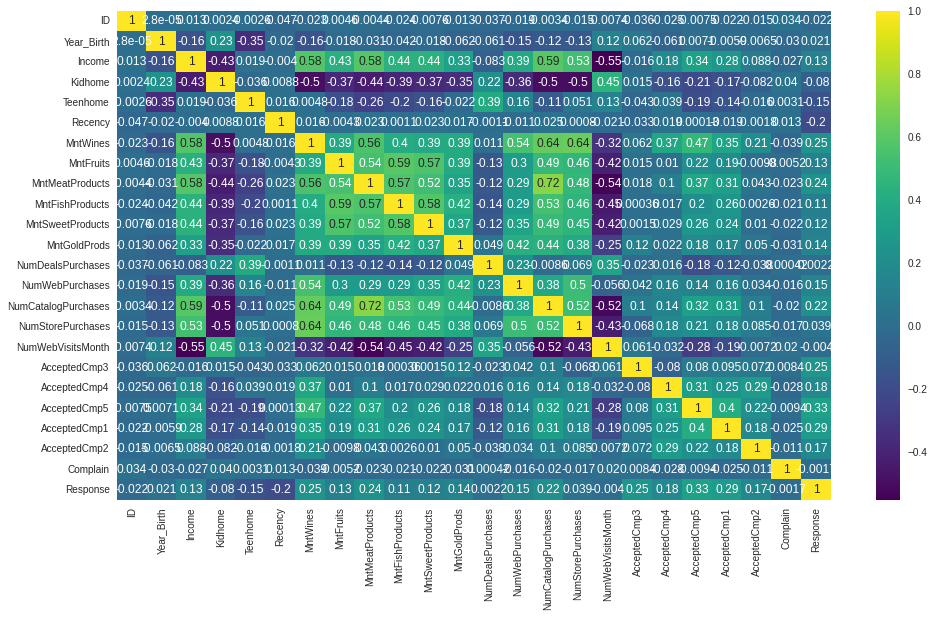

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(x.corr(),annot = True,cmap = 'viridis')
plt.show()

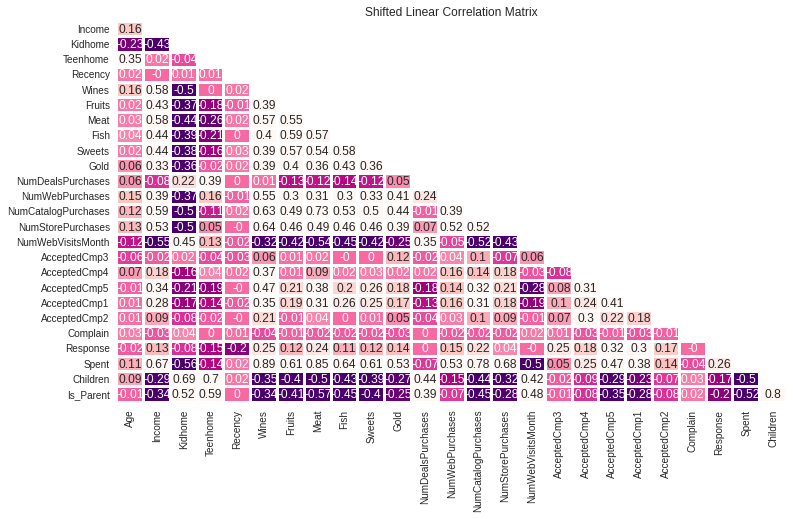

In [ ]:
''' Plot aa Shifted Correlation Matrix '''
#Đường chéo correl luôn thống nhất và ít liên quan hơn, các biến chuyển đổi
# chỉ hiển thị các trường hợp có liên quan
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(df)

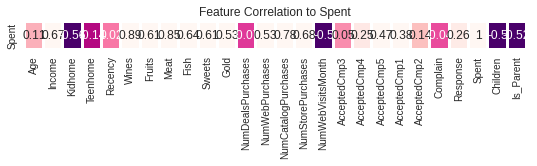

In [ ]:
'''Plot Correlation to Target Variable only'''
def corrMat2(df,target='Spent',figsize=(9,0.5),ret_id=False):
    
    corr_mat = df.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, df.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0, 
                     cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Feature Correlation to {target}')
    
    if(ret_id):
        return corr
corrMat2(df.drop(['Education','Marital_Status','Dt_Customer'],axis = 1))

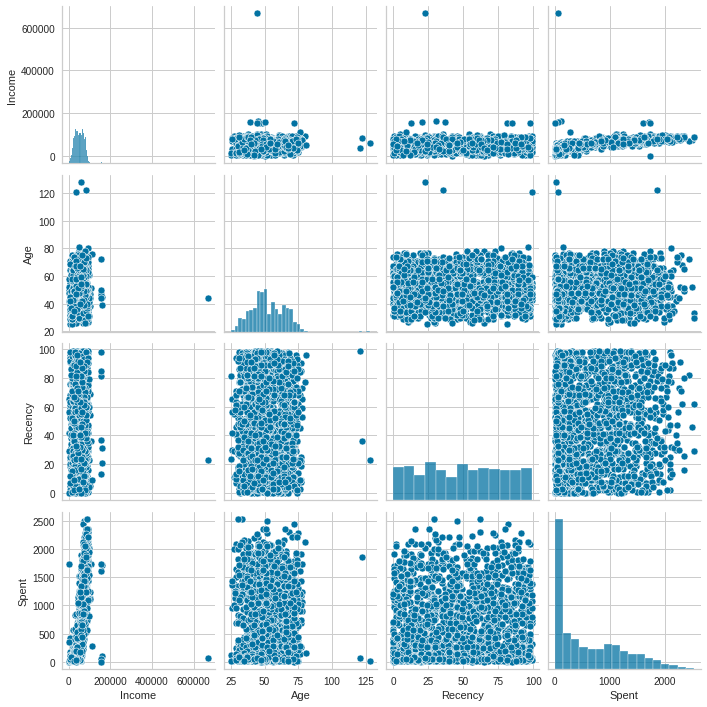

In [ ]:
sns.pairplot(df[['Income','Age','Recency','Spent','Marital_Status']])

In [ ]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

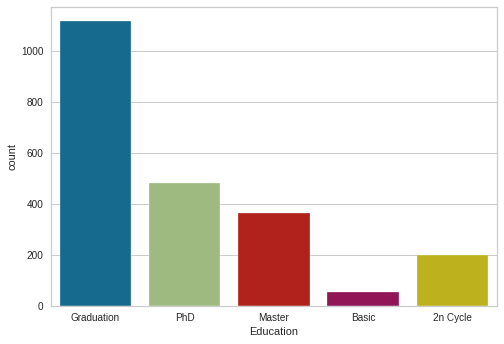

In [ ]:
sns.countplot(x = 'Education' , data = df)
plt.show()
# Basic có số lượng thấp nhất.

In [ ]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

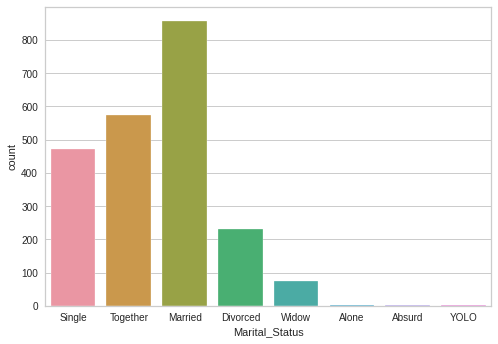

In [ ]:
sns.countplot( x = 'Marital_Status',data = df)
plt.show()
# Widow,Alone,Absurd,Yolo có tỉ lệ thấp hơn trong nhóm 

In [ ]:
obj = ['Education','Marital_Status']

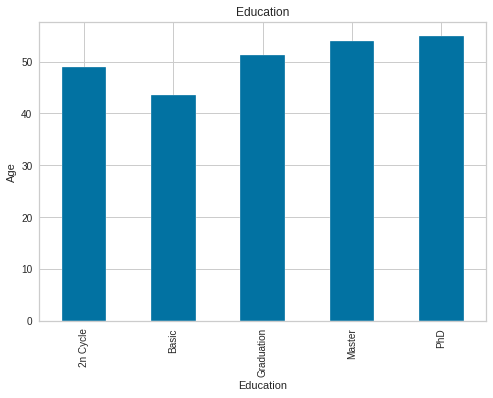

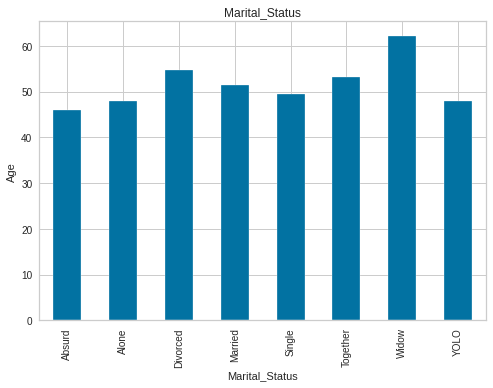

In [ ]:
for i in obj:
    data=df.copy()
    data.groupby(i)['Age'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Age')
    plt.title(i)
    plt.show()


# trung bình tuổi của những người có bằng masters,PhD,Graduation là trên 50 tuổi
# tuổi của những người cơ bản thấp hơn còn lại và dưới 50 tuổi
# tuổi của các widows cao hơn 60 tuổi
# trung bình tuổi của những người absurd,yolo,single và alone dưới 50 tuổi. 

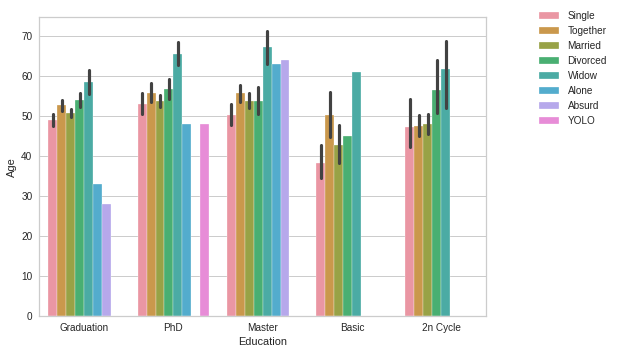

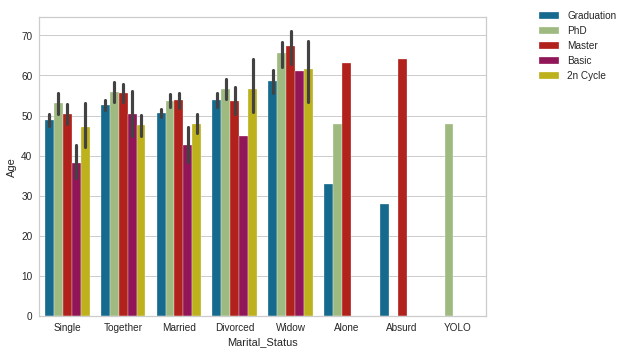

In [ ]:
# I found no relations
for i in range(len(obj)):
    for j in range(2):
        x = obj[i]
        if obj[j] != x:
            sns.barplot(x= x,y='Age',hue=obj[j],data=df)
            plt.legend(bbox_to_anchor=(1.1, 1.05))
            plt.show()

In [ ]:
df7 = df.copy()

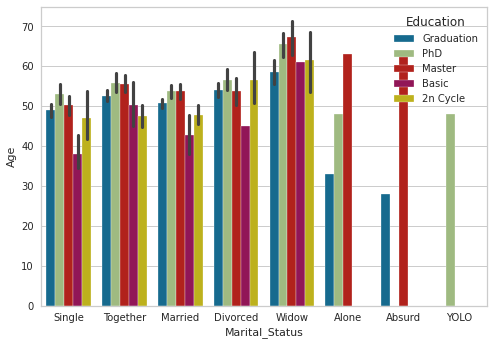

In [ ]:
for i in range(len(obj)):
    x='Marital_Status'
    for j in range(1):
        if obj[i] != x:
            sns.barplot(x= x,y='Age',hue=obj[i],data=df7)
            sns.set(rc={'figure.figsize':(11,12)})
            plt.show()


###Số người single có bằng PhD nhiều hơn số người làm cơ bản và độ tuổi trung bình từ 40-50
###Số người có bằng PhD và Master bằng nhau và ít hơn số người có 2n Cycle và độ tuổi trung bình là từ 50-60
### khi đã kết hôn thì số có bằng PhD và Master hầu như bằng nhau, ít hơn số người làm cơ bản và độ tuổi trung bình là từ 40-50 
### khi ly hôn thì có số người có bằng PhD bằng số người có 2n Cycle  và độ tuổi trung bình là từ 50 - 60
### Góa phụ thì có số người bằng Master nhiều hơn và số người bằng Graduation  ít hơn và độ tuổi trung bình là từ 60-70
### Số người Alone thì chỉ có 3 hạng Graduation ,PhD và Master và chỉ có Master có tuổi trung bình là thấp hơn từ 40-50
### Số người Absurd thì chỉ có 2 hạng là Master và Graduation và độ tuổi trung bình Master là  hơn  là từ 40-50
### Số người yolo chỉ có bằng PhD
### Điều này hữu ích cho việc phân loại

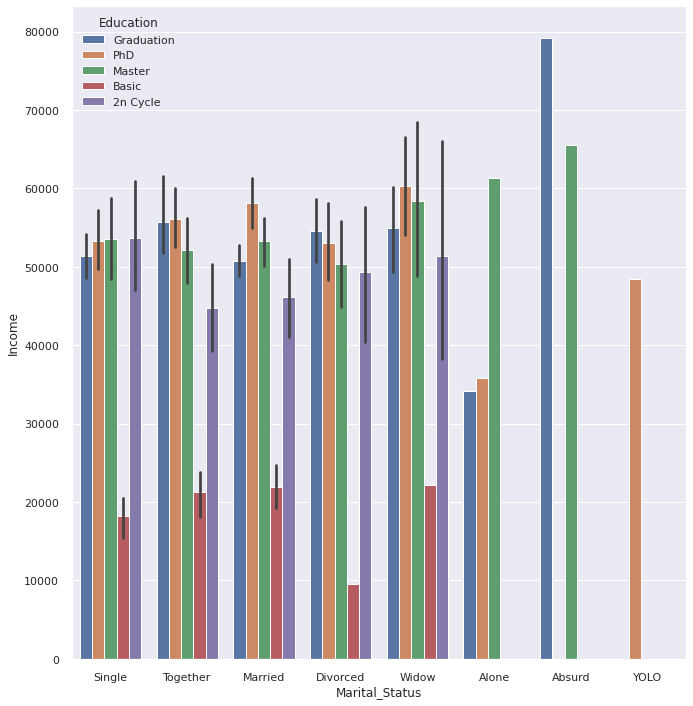

In [ ]:
for i in range(len(obj)):
    x='Marital_Status'
    for j in range(1):
        if obj[i] != x:
            sns.barplot(x= x,y='Income',hue=obj[i],data=df7)
            sns.set(rc={'figure.figsize':(11,12)})
            plt.show()



## Thu nhập đối với tất cả những người Basic là thấp hơn 
### Thu nhập đối với người single thì người có bằng 2nCycle, Master ,PhD gần như bằng nhau và ít hơn đối với Basic 
### Thu nhập với người graduation,masters, PhD trung bình trên 40k
### Thu nhập trung bình người Basic  là 10k đến 20k

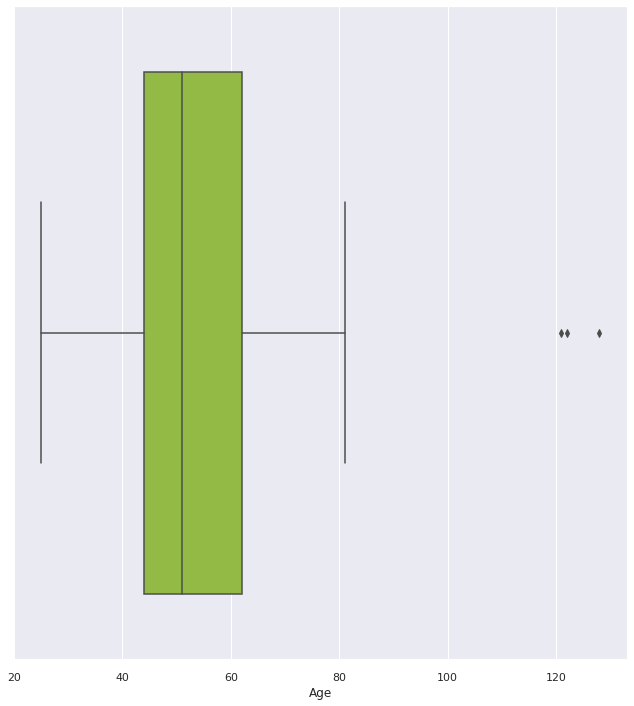

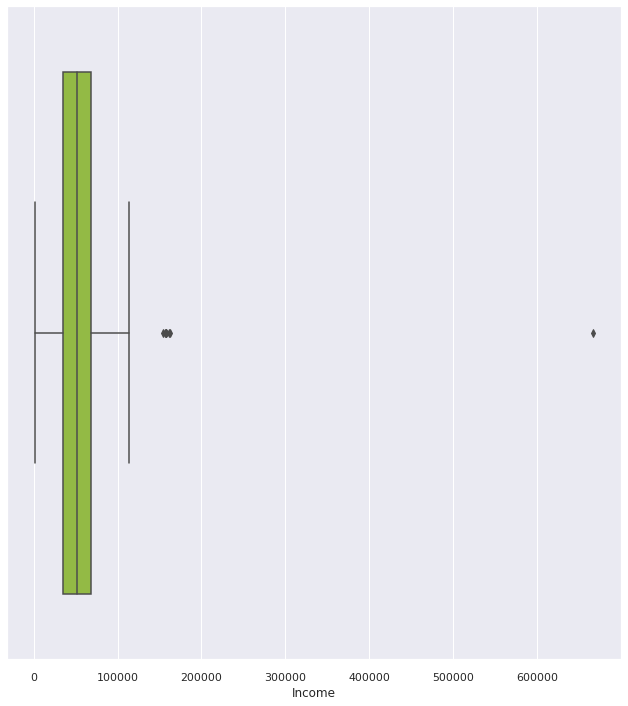

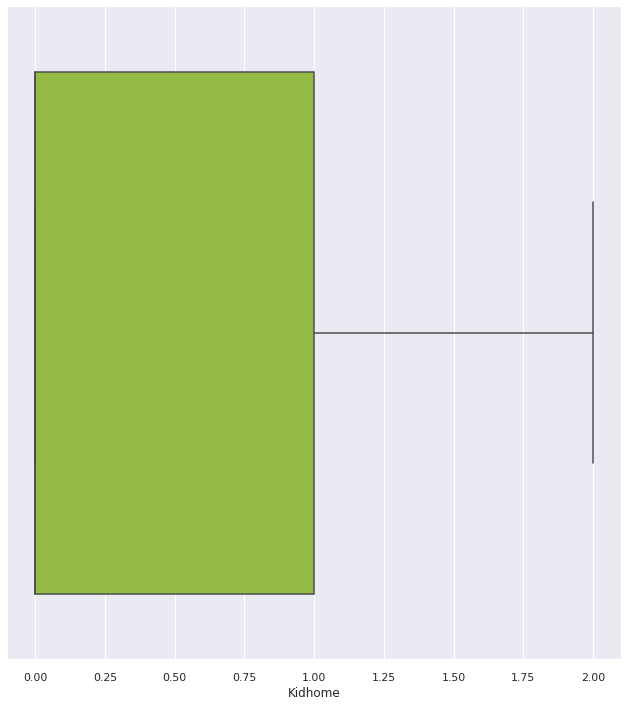

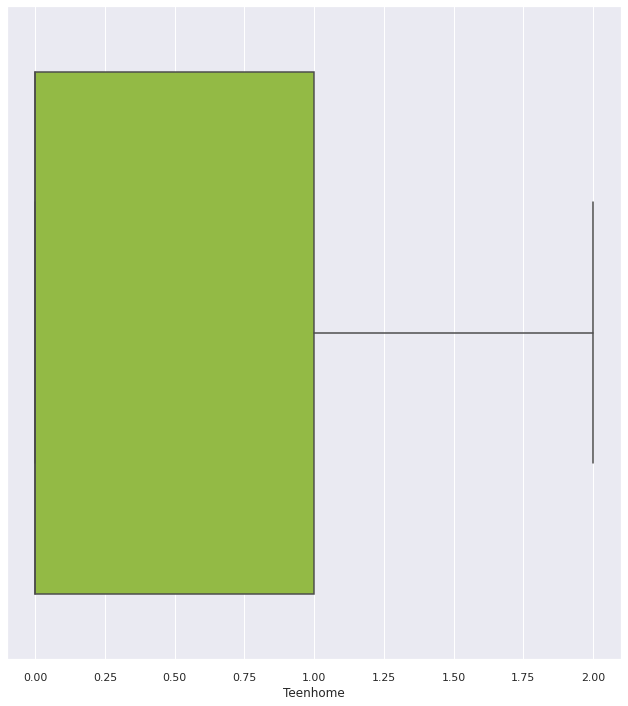

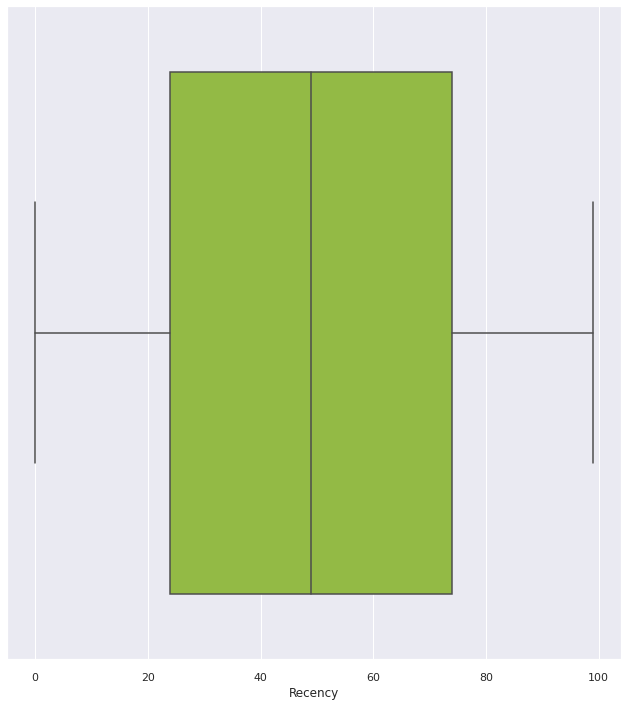

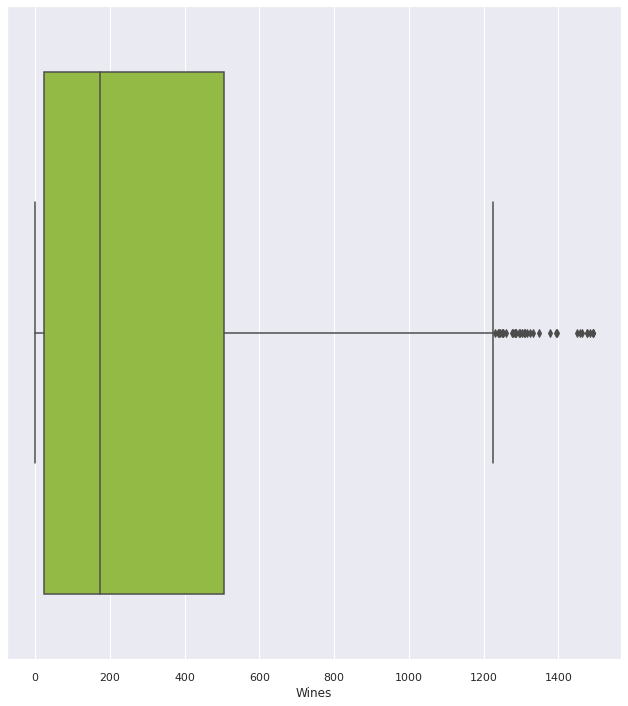

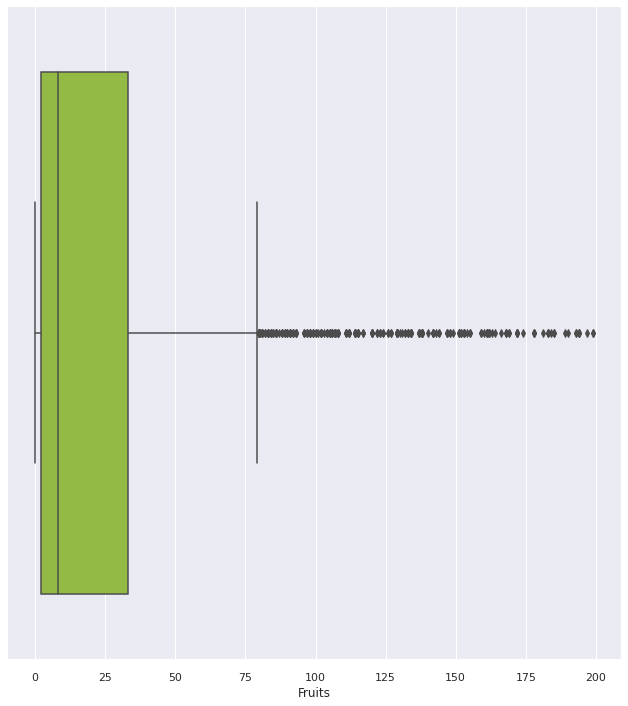

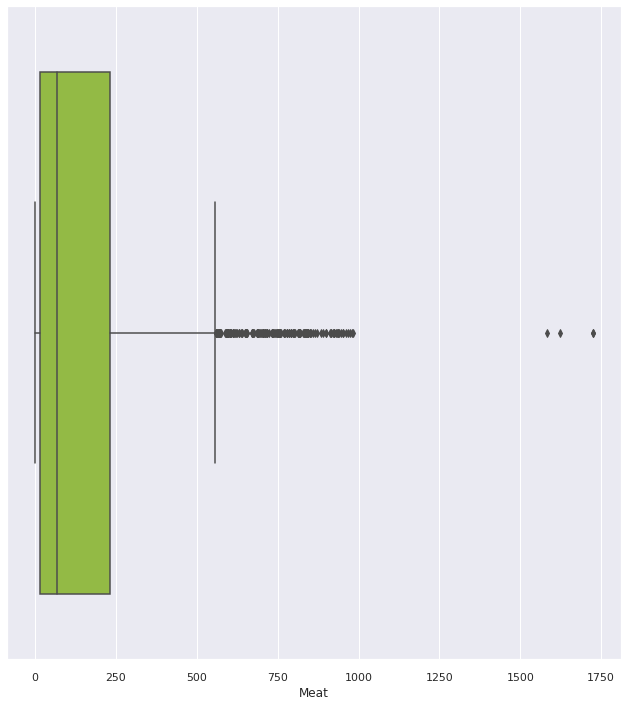

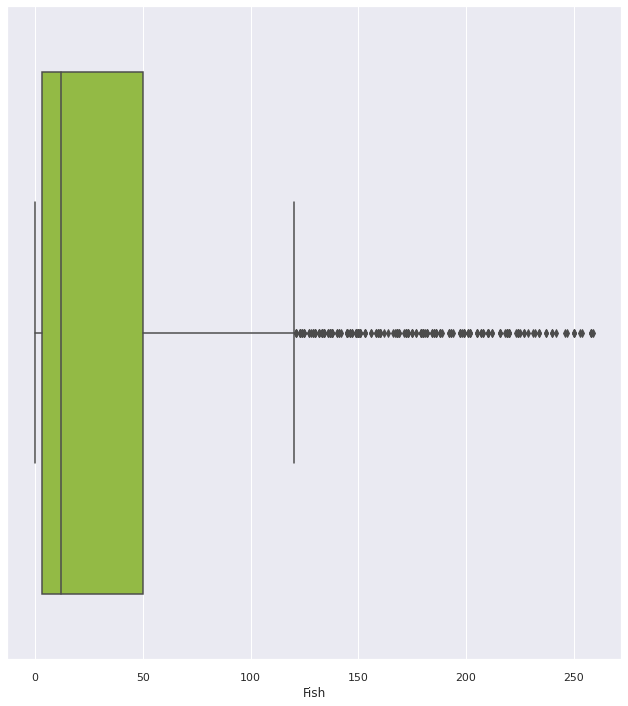

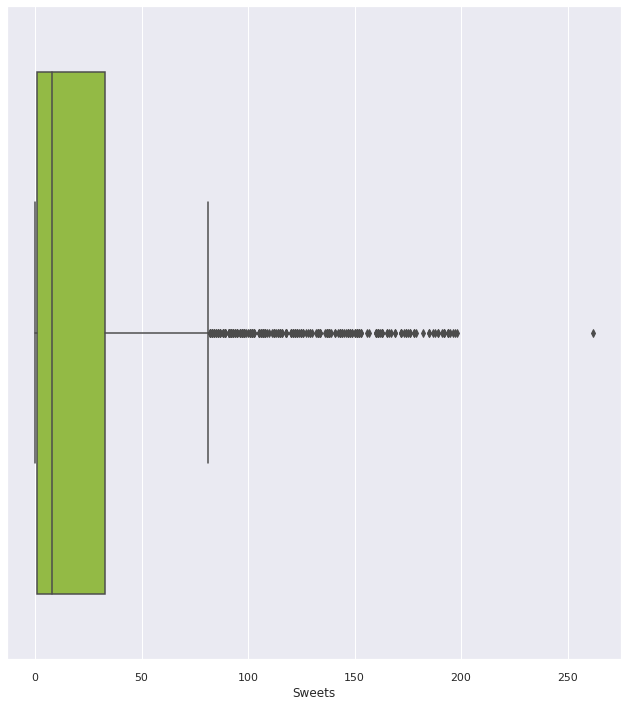

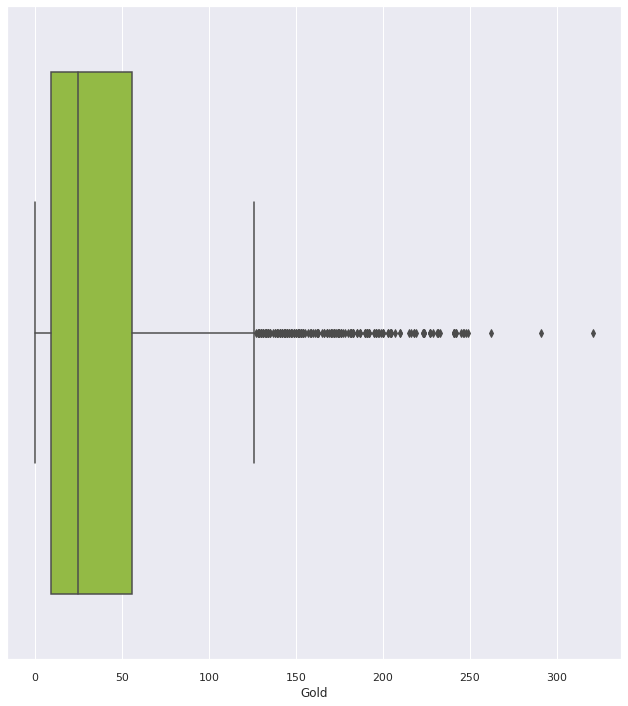

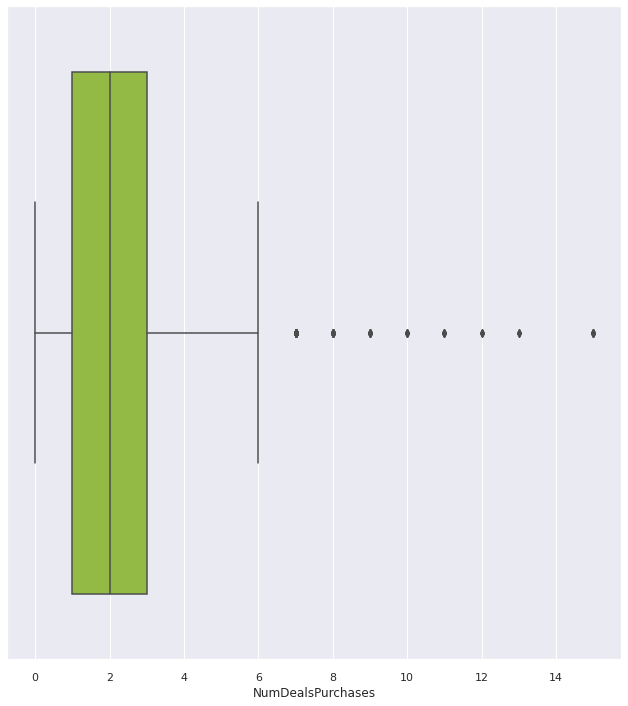

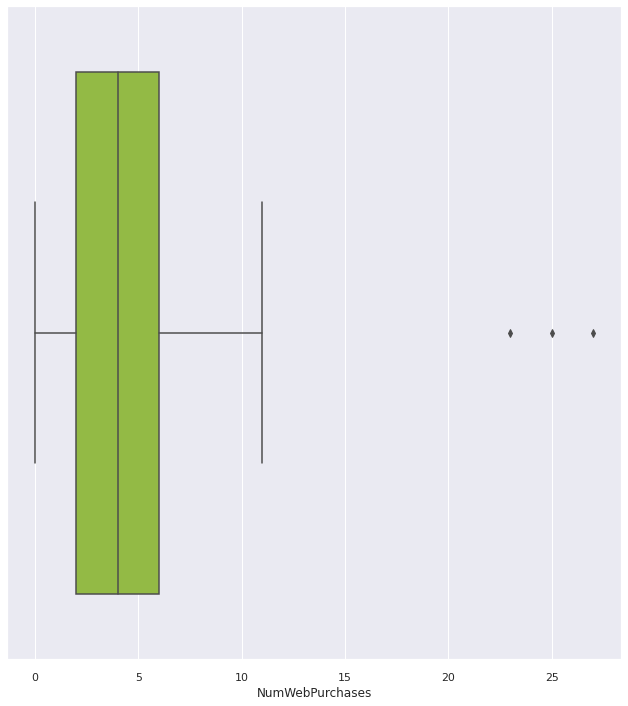

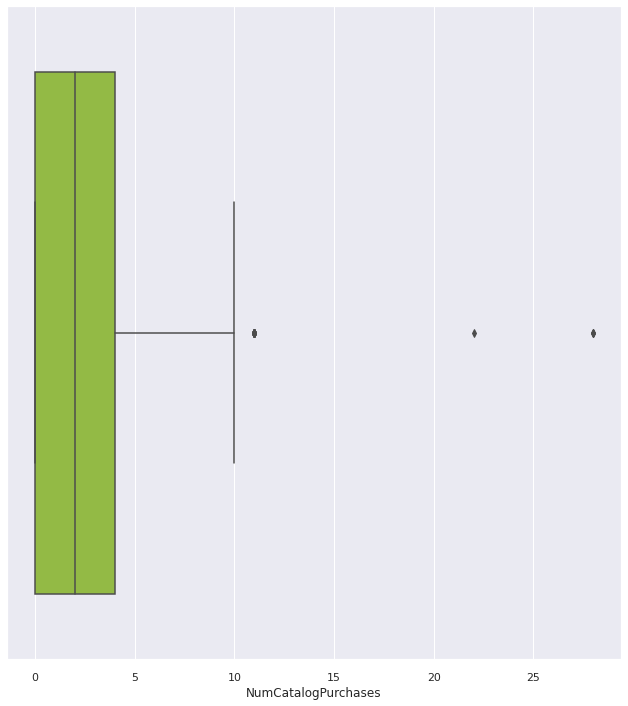

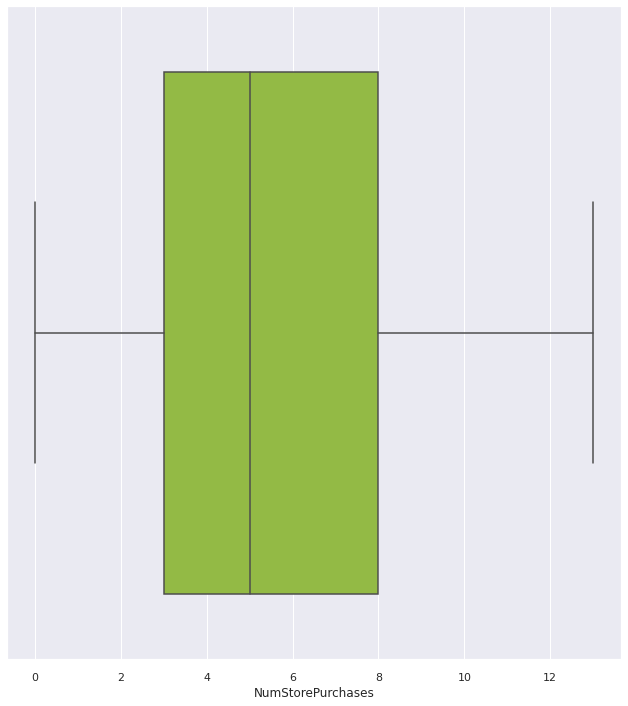

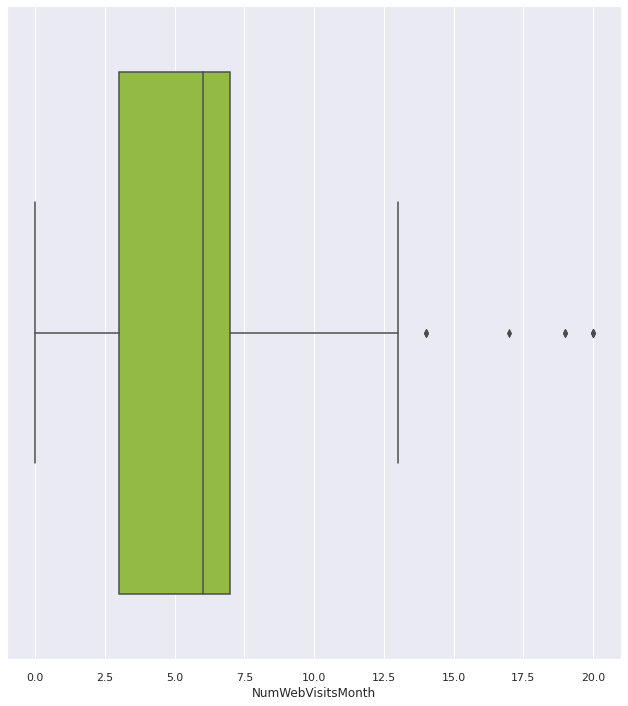

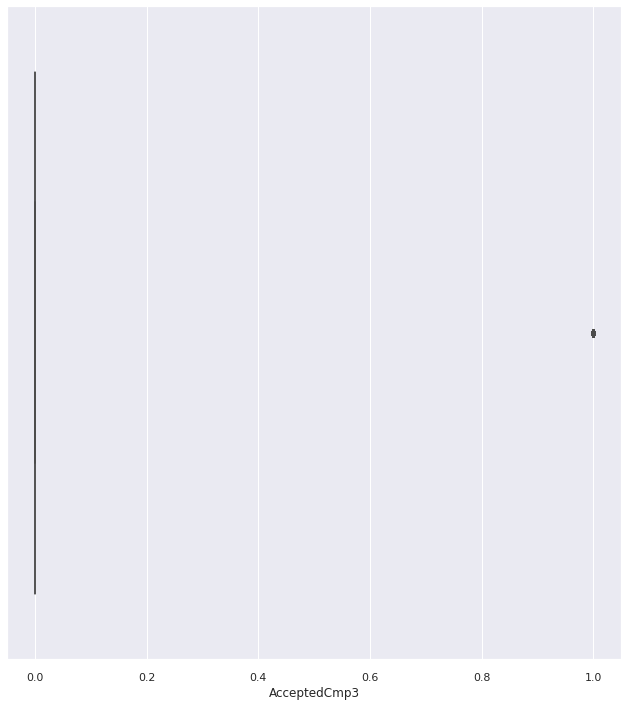

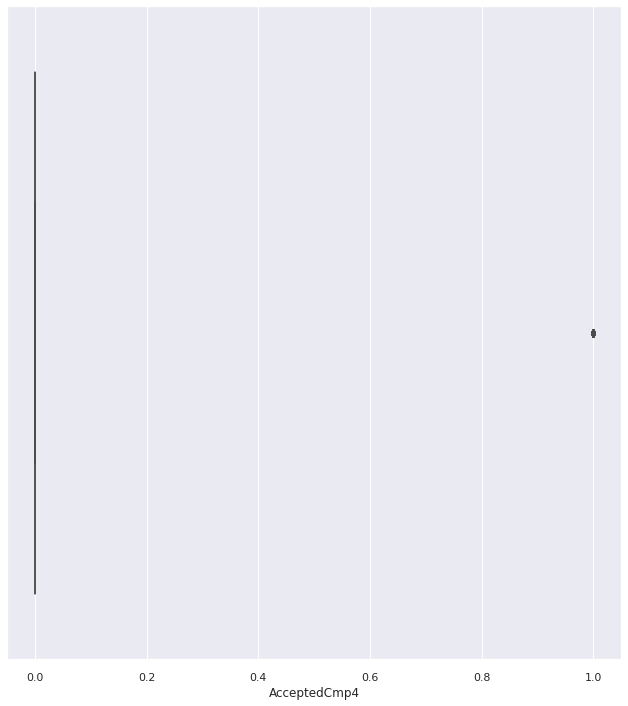

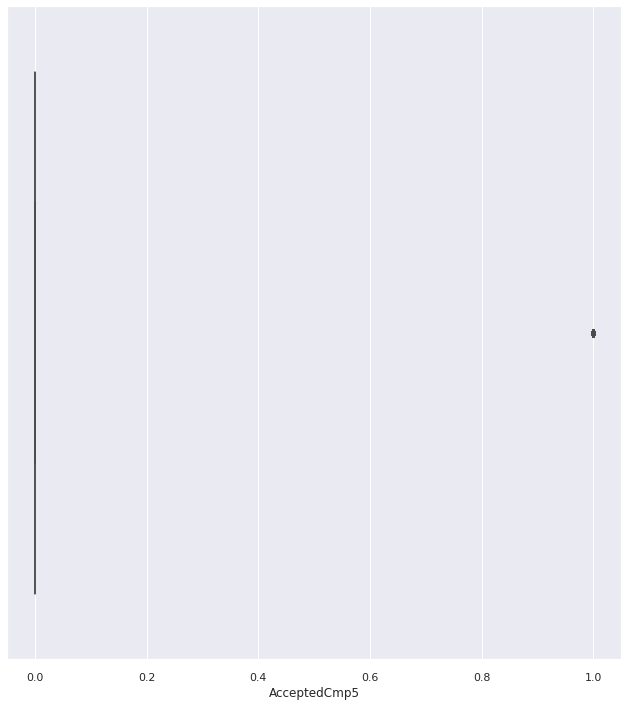

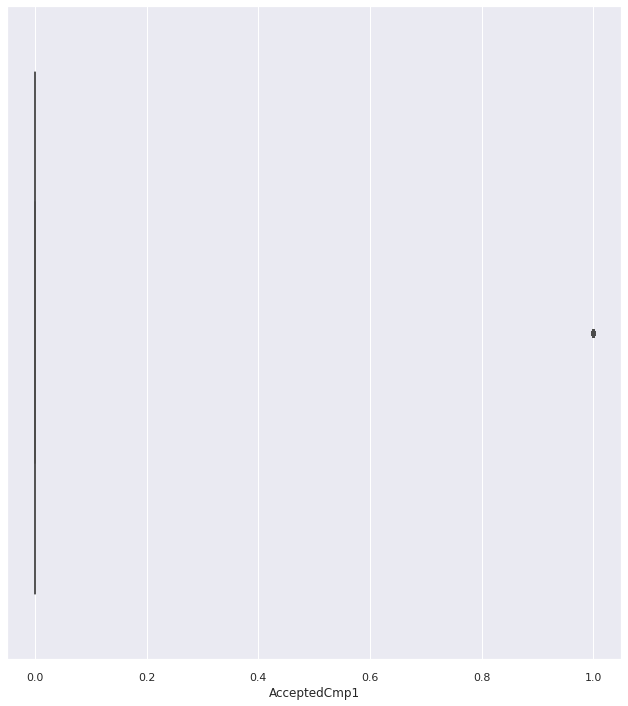

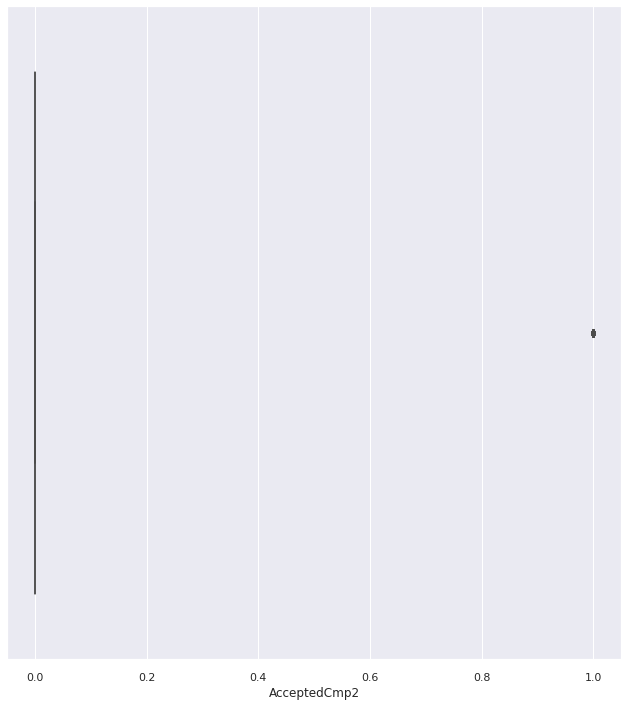

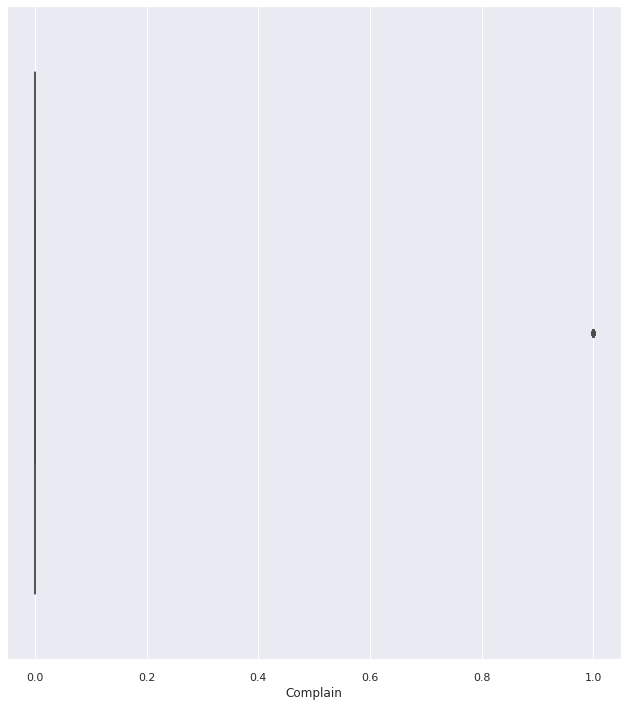

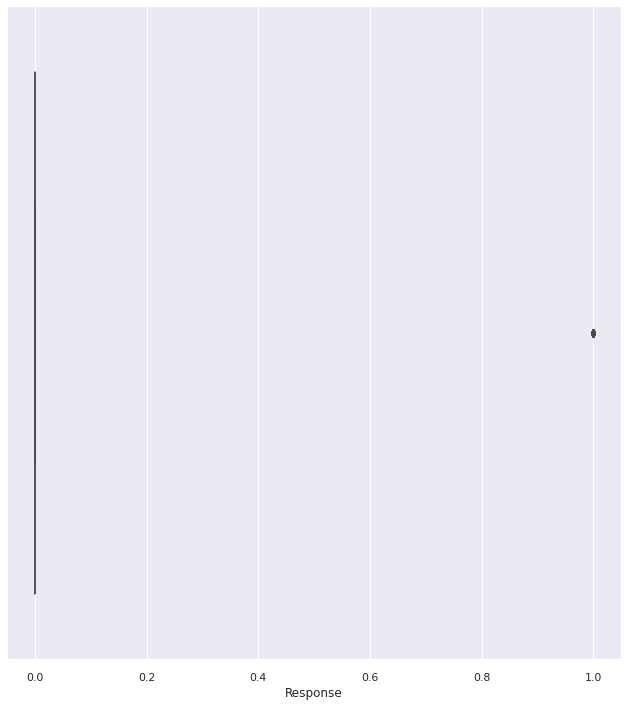

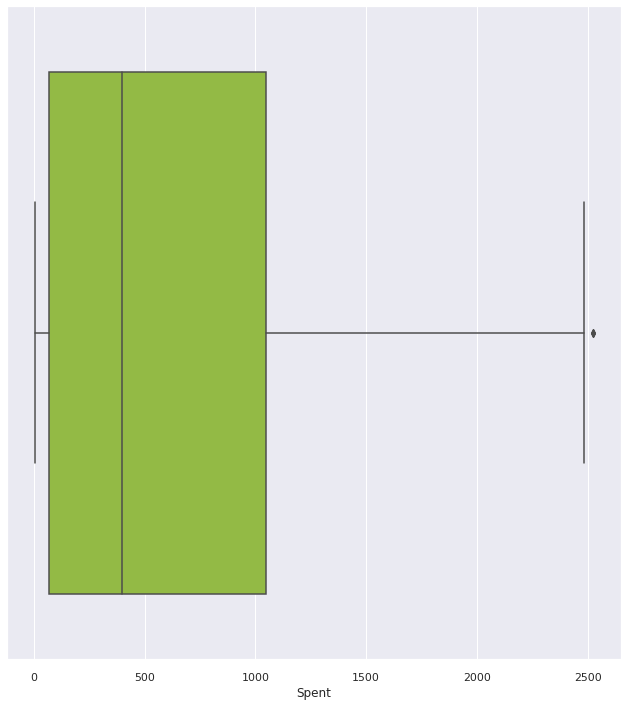

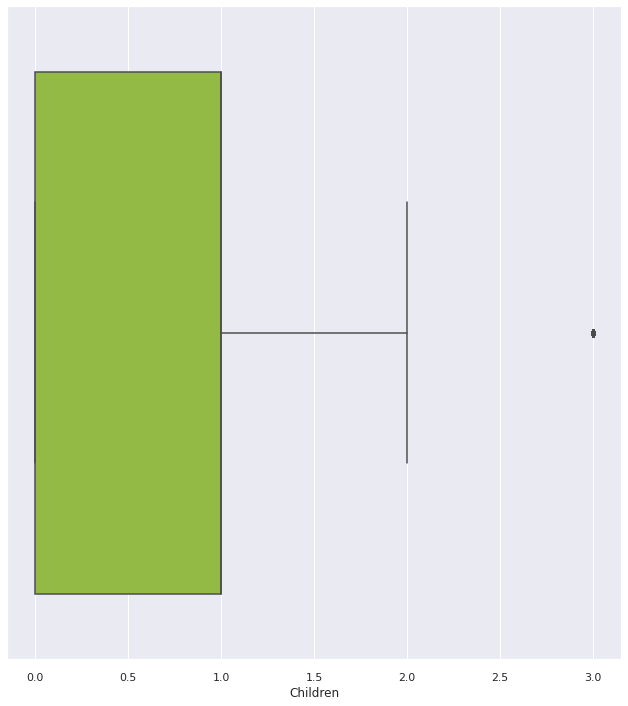

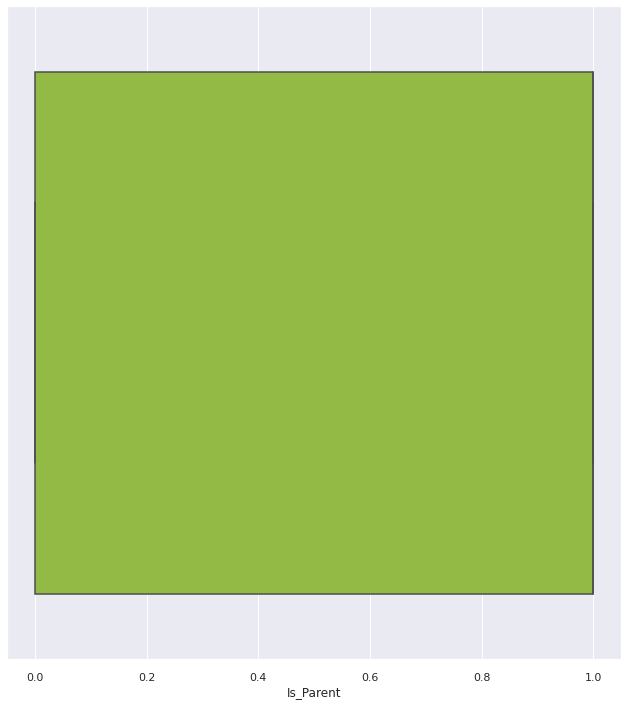

In [ ]:
y = df.drop(['Education','Marital_Status','Dt_Customer'],axis = 1)
for i in y.columns:
    sns.boxplot(x = i, data = y,color = 'yellowgreen')   
    plt.xlabel(i)
    plt.show()

# Data Preprocessing

## Count of ouliers using using IQR method

In [ ]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in y.columns:
    count_outliers(df,i)

There are outliers in Age
Count of outliers are: 3
There are outliers in Income
Count of outliers are: 8
No outliers in Kidhome
No outliers in Teenhome
No outliers in Recency
There are outliers in Wines
Count of outliers are: 35
There are outliers in Fruits
Count of outliers are: 246
There are outliers in Meat
Count of outliers are: 174
There are outliers in Fish
Count of outliers are: 222
There are outliers in Sweets
Count of outliers are: 246
There are outliers in Gold
Count of outliers are: 205
There are outliers in NumDealsPurchases
Count of outliers are: 84
There are outliers in NumWebPurchases
Count of outliers are: 3
There are outliers in NumCatalogPurchases
Count of outliers are: 23
No outliers in NumStorePurchases
There are outliers in NumWebVisitsMonth
Count of outliers are: 8
There are outliers in AcceptedCmp3
Count of outliers are: 163
There are outliers in AcceptedCmp4
Count of outliers are: 164
There are outliers in AcceptedCmp5
Count of outliers are: 162
There are outlie

## Encoding

In [ ]:

LE=LabelEncoder()
for i in obj:
    df[i]=df[[i]].apply(LE.fit_transform)
df['Dt_Customer']=df[['Dt_Customer']].apply(LE.fit_transform)

In [ ]:
df.dtypes

Age                      int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer              int64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Spent                    int64
Children                 int64
Is_Parent                int64
dtype: object

# (Important) Analysis Using Groupby

In [ ]:
df1 = df.groupby('Age').agg({ 'Education' : 'count', 'Marital_Status' : 'count', 'Income':'mean', 'Kidhome' : 'count',
       'Teenhome' : 'count',  'Recency':'mean', 
        'NumDealsPurchases' : 'mean', 'NumWebPurchases' : 'mean',
       'NumCatalogPurchases' : 'mean', 'NumStorePurchases' : 'mean', 'NumWebVisitsMonth' : 'mean',
        'Complain' : 'sum', 'Response' : 'sum', 'Spent' : 'mean'})
df1

Education  Marital_Status        Income  ...  Complain  Response        Spent
Age                                           ...                                 
25           2               2  10960.500000  ...         0         1    69.000000
26           5               5  60937.000000  ...         1         1   761.200000
27           3               3  85449.333333  ...         0         1  1457.333333
28           5               5  74139.800000  ...         0         2  1191.200000
29          13              13  47830.153846  ...         0         1   685.538462
30          15              15  60900.333333  ...         0         4  1112.333333
31          18              18  40919.277778  ...         0         4   532.000000
32          29              29  42250.172414  ...         0         1   426.689655
33          29              29  47947.758621  ...         1         2   720.068966
34          27              27  46888.666667  ...         0         6   617.185185
35          41              41  43346.414634  ...         0         9   520.731707
36          32              32  39192.937500  ...         0         4   364.343750
37          38              38  39132.789474  ...         1        11   390.052632
38          41              41  47996.390244  ...         1        11   515.658537
39          44              44  52683.795455  ...         0        13   774.704545
40          38              38  46894.921053  ...         1         5   470.552632
41          39              39  49927.025641  ...         0         5   512.461538
42          53              53  44956.528302  ...         1         6   498.150943
43          76              76  46012.434211  ...         2         3   429.105263
44          52              52  62653.038462  ...         1        11   528.692308
45          89              89  47539.213483  ...         1         8   507.303371
46          83              83  52417.132530  ...         0        11   578.927711
47          69              69  48338.898551  ...         0        11   455.840580
48          72              72  47219.722222  ...         0        11   418.972222
49          78              78  51123.333333  ...         0        14   583.705128
50          86              86  49354.906977  ...         0        14   512.930233
51          75              75  52395.973333  ...         0        16   692.493333
52          70              70  51205.628571  ...         0        10   643.285714
53          51              51  48597.450980  ...         0         6   468.098039
54          44              44  53782.431818  ...         0         6   602.545455
55          50              50  50960.460000  ...         0         7   560.760000
56          74              74  55668.662162  ...         0         6   605.202703
57          41              41  56473.902439  ...         1         5   714.609756
58          44              44  48815.863636  ...         0         6   565.840909
59          44              44  60988.954545  ...         0         5   780.863636
60          35              35  57161.057143  ...         0         8   771.171429
61          49              49  54817.632653  ...         0         4   608.000000
62          50              50  56324.080000  ...         3         6   696.580000
63          52              52  58603.711538  ...         0         5   737.500000
64          41              41  54020.268293  ...         0         8   653.682927
65          55              55  56706.600000  ...         0         8   688.509091
66          48              48  57611.375000  ...         1         8   704.750000
67          49              49  58628.387755  ...         2         7   767.755102
68          35              35  57810.000000  ...         0         7   728.457143
69          52              52  56903.673077  ...         0         6   633.500000
70          42              42  55999.857143  ...         1         1   678.285714
71          29       

In [ ]:
# Phân tích nhóm theo Education 
df2 = df.groupby('Education').agg({ 'Age' : 'mean', 'Education' : 'count', 'Marital_Status' : 'sum', 'Income':'mean', 'Kidhome' : 'count',
       'Teenhome' : 'count',  'Recency':'mean', 
        'NumDealsPurchases' : 'mean', 'NumWebPurchases' : 'mean',
       'NumCatalogPurchases' : 'mean', 'NumStorePurchases' : 'mean', 'NumWebVisitsMonth' : 'mean',
        'Complain' : 'sum', 'Response' : 'sum', 'Spent' : 'mean'})
df2
#2n Cycle       0
#Basic          1
#Graduation     2
#Master         3
#PhD            4

Age  Education  Marital_Status  ...  Complain  Response       Spent
Education                                        ...                                
0          48.970000        200             740  ...         4        22  494.930000
1          43.537037         54             210  ...         0         2   81.796296
2          51.363799       1116            4145  ...        14       152  621.686380
3          54.052055        365            1365  ...         2        56  609.767123
4          54.956341        481            1797  ...         1       101  676.733888

[5 rows x 15 columns]


##Đa số những người có bằng cử nhân có mức chi tiêu trung bình cao 
##Những người bình thường thì có mức thu nhập thấp nên mức chi tiêu của họ cũng tương đối thấp trong nhóm
##Những người có bằng tiến sĩ chiếm thứ 2 trong nhóm nhưng có mức thu nhập và chi tiêu nhiều hơn hẳn so với còn lại
##Có thể thấy càng có thu nhập cao thì mức chi tiêu càng lớn.

In [ ]:
df3 = df.groupby('Marital_Status').agg({ 'Age' : 'mean', 'Education' : 'count', 'Marital_Status' : 'sum', 'Income':'mean', 'Kidhome' : 'count',
       'Teenhome' : 'count',  'Recency':'mean', 
        'NumDealsPurchases' : 'mean', 'NumWebPurchases' : 'mean',
       'NumCatalogPurchases' : 'mean', 'NumStorePurchases' : 'mean', 'NumWebVisitsMonth' : 'mean',
        'Complain' : 'sum', 'Response' : 'sum', 'Spent' : 'mean'})
df3

#Absurd        0
#Alone         1
#Divorced      2
#Married       3
#Single        4
#Together      5
#Widow         6
#YOLO          7


Age  Education  ...  Response        Spent
Marital_Status                        ...                       
0               46.000000          2  ...         1  1192.500000
1               48.000000          3  ...         1   256.666667
2               54.724138        232  ...        48   610.629310
3               51.431739        857  ...        98   591.464411
4               49.428875        471  ...       106   612.592357
5               53.253054        573  ...        60   608.846422
6               62.236842         76  ...        18   727.960526
7               48.000000          2  ...         1   424.000000

[8 rows x 15 columns]

# Feature Scaling

In [ ]:
del_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = df.drop(del_cols, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_features = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [ ]:
scaled_features.head()

Age  Education  Marital_Status  ...     Spent  Children  Is_Parent
0  0.986443  -0.350527        0.254218  ...  1.675488 -1.264803  -1.581389
1  1.236801  -0.350527        0.254218  ... -0.962358  1.405806   0.632356
2  0.318822  -0.350527        1.182303  ...  0.280250 -1.264803  -1.581389
3 -1.266777  -0.350527        1.182303  ... -0.919224  0.070501   0.632356
4 -1.016420   1.429011       -0.673866  ... -0.307044  0.070501   0.632356

[5 rows x 22 columns]

# Dimensionality reduction using PCA

In [ ]:
#Principal component analysis (PCA) là một kĩ thuật nhằm giảm số chiều trong cơ sở dữ liệu
#tăng mối tương quan cũng đồng thời tối ưu mất mát thông tin
pca = PCA(n_components=3)
pca.fit(scaled_features)
PCA_df = pd.DataFrame(pca.transform(scaled_features), columns=(["Education","Income", "Kidhome"]))
PCA_df.describe().T

count          mean       std  ...       50%       75%       max
Education  2216.0 -2.725457e-17  2.782457  ... -0.802926  2.321364  7.435711
Income     2216.0 -8.617255e-18  1.605520  ... -0.168120  1.203562  5.698685
Kidhome    2216.0 -6.783583e-17  1.180168  ...  0.006080  0.781746  5.277843

[3 rows x 8 columns]

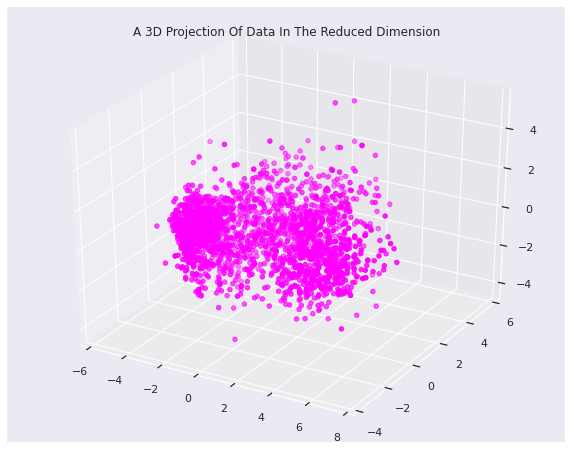

In [ ]:
#Tạo một 3D projection trong việc giảm số chiều
x =PCA_df["Education"]
y =PCA_df["Income"]
z =PCA_df["Kidhome"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="magenta", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

3672.1673850928833

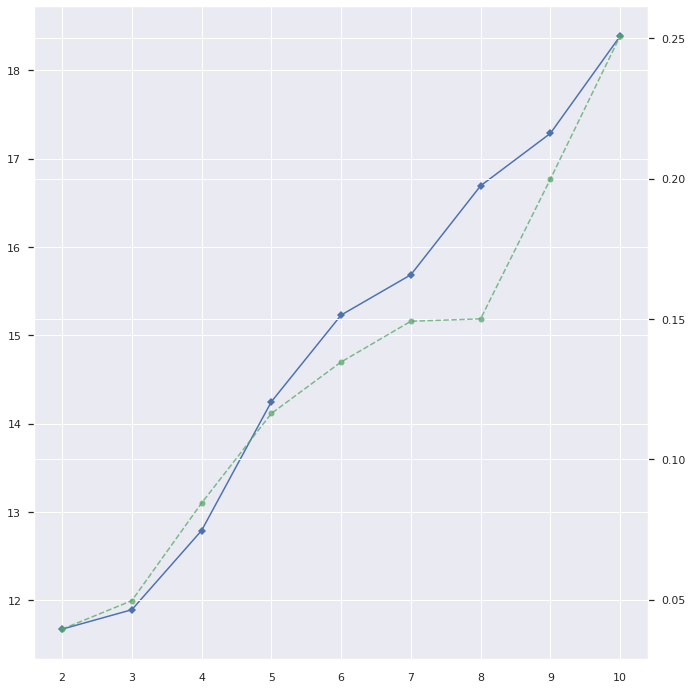

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(PCA_df)     # Fit dữ liệu vào visualizer
visualizer.inertia_        # Plot 

In [ ]:
# Initiating  the  Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit and predict model  
AC_df = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = AC_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= AC_df

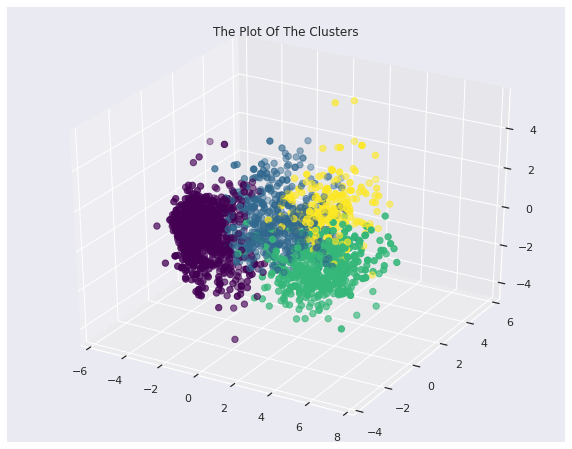

In [ ]:
# Plotting clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Evaluating models

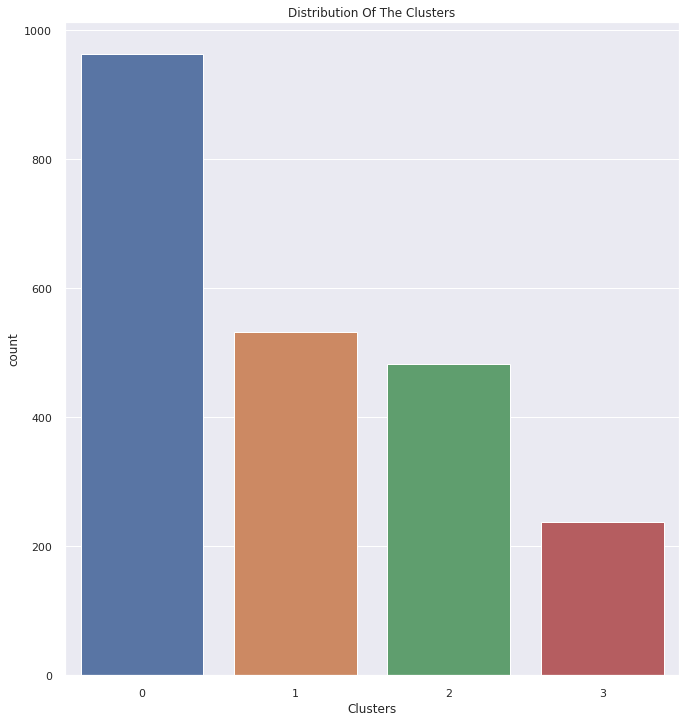

In [ ]:
# Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

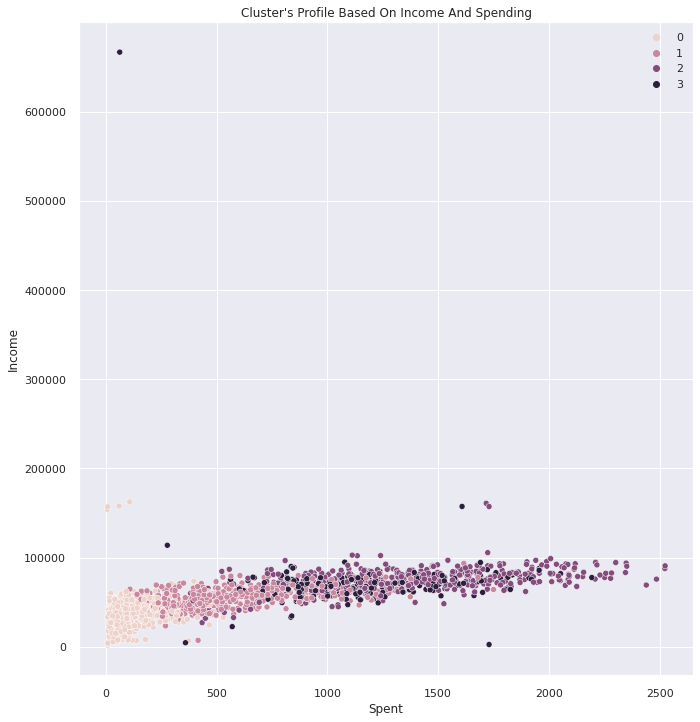

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

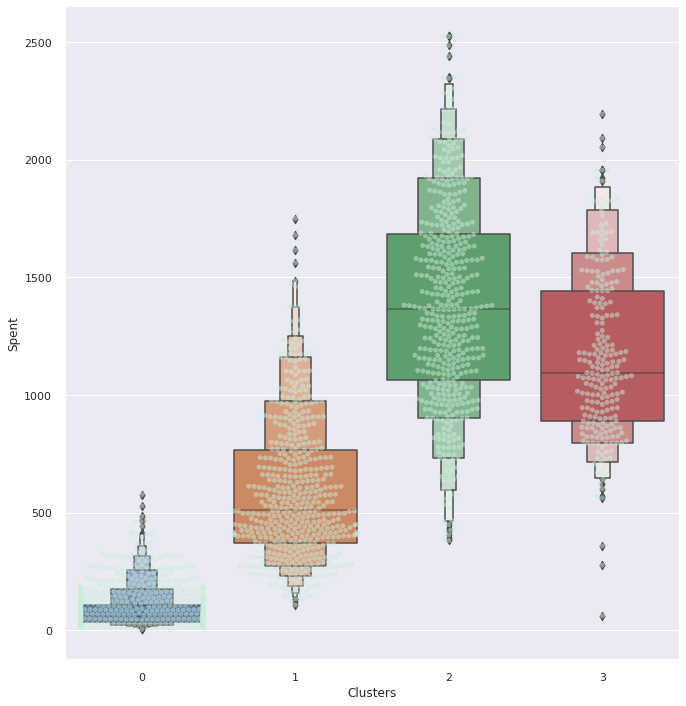

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

## Cluster 2 là nhóm khách hàng lớn nhất cùng với nhóm khách hàng 1
## Mục đích xem mỗi nhóm đang chi tiêu cho những gì nhằm giúp tối ưu  các chiến lược tiếp thị 

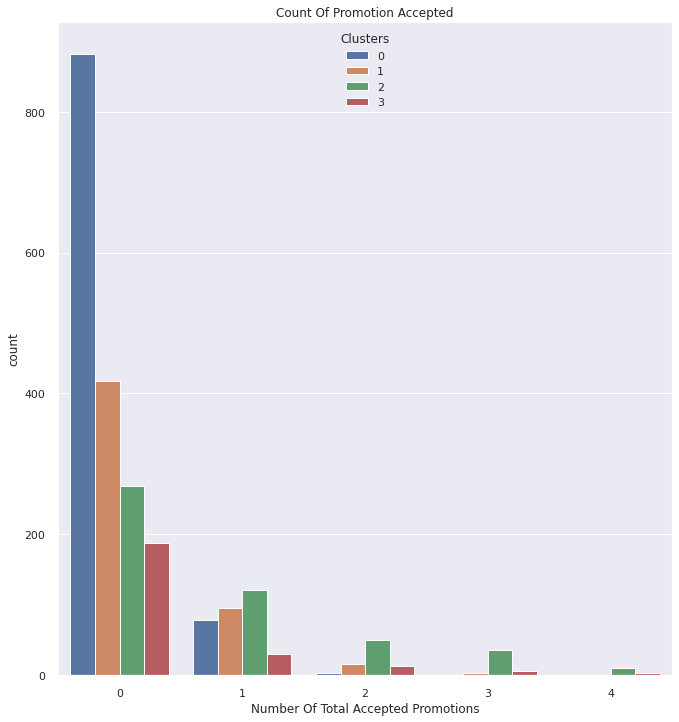

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

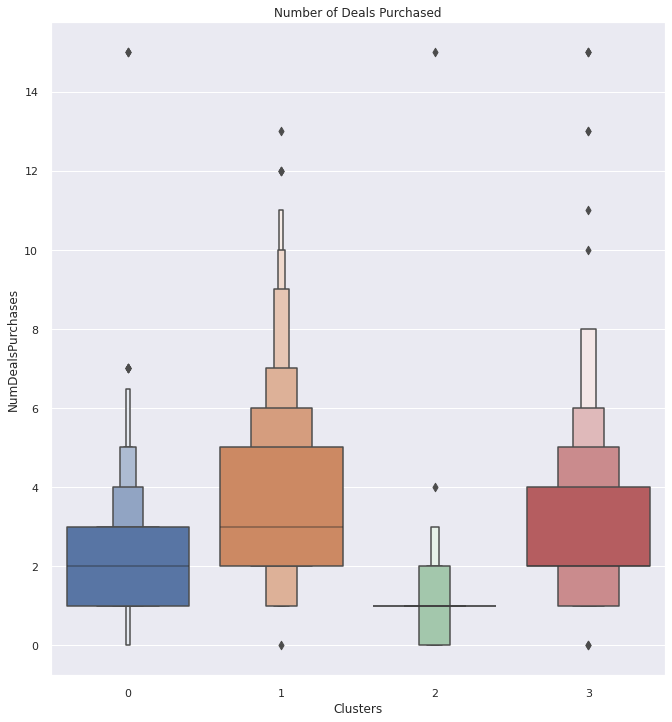

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

# Affinity Clustering Model

## Affinity Propagation liên quan đến việc tìm một tập hợp các ví dụ  nhằm tóm tắt dữ liệu tốt nhất có thể.
## Nó được triển khai thông qua lớp Affinity Propagation và cấu hình chính để điều chỉnh là "damping" (hệ số suy giảm) được đặt từ 0,5 đến 1 .

In [ ]:
from sklearn.cluster import AffinityPropagation
#Initiating the Affinity Clustering model 
AP = AffinityPropagation(damping=0.9)
# fit model and predict clusters
AP_df = AP.fit_predict(PCA_df)
PCA_df["Clusters"] = AP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= AP_df

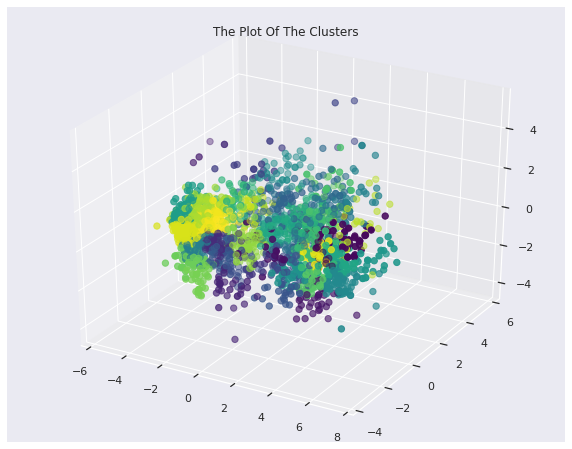

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

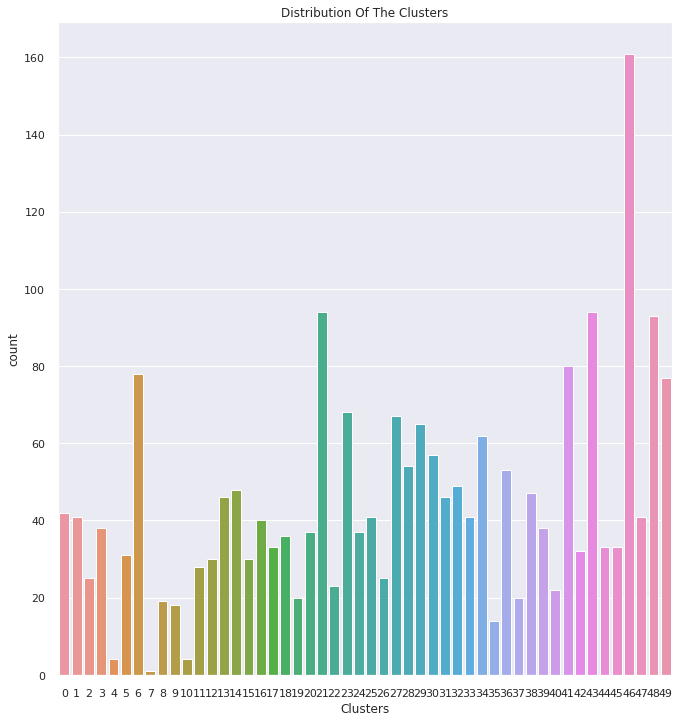

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

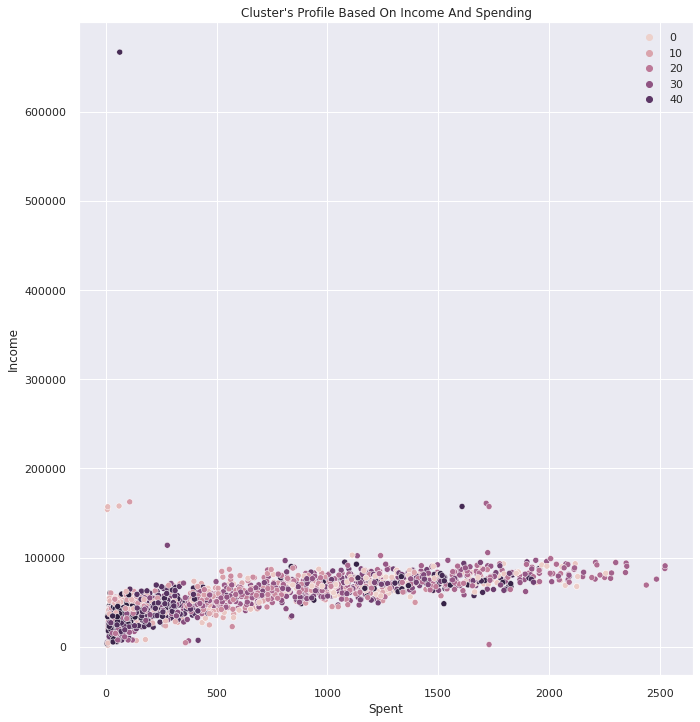

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

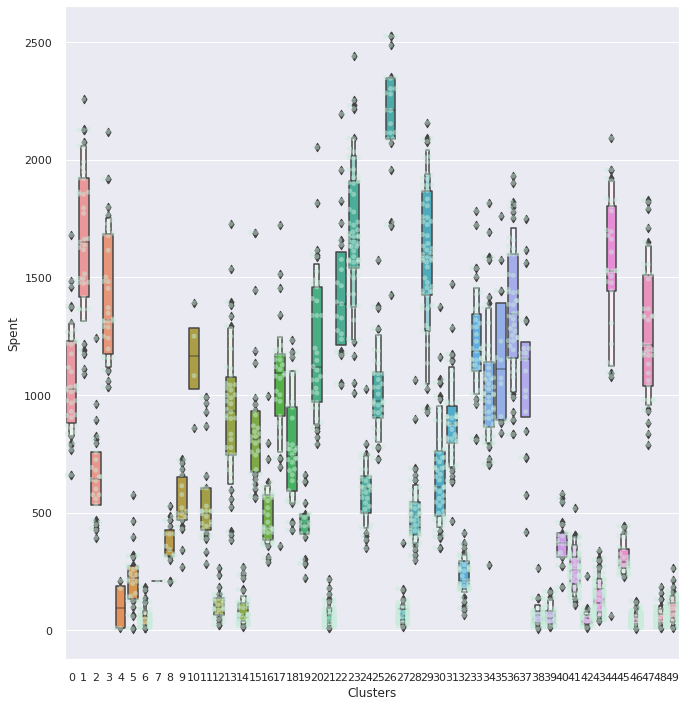

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

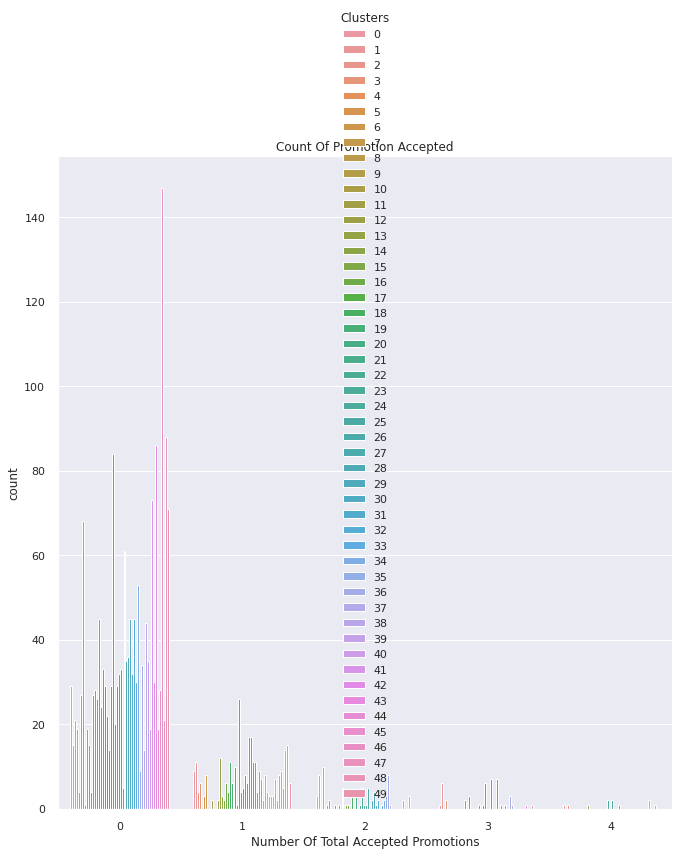

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

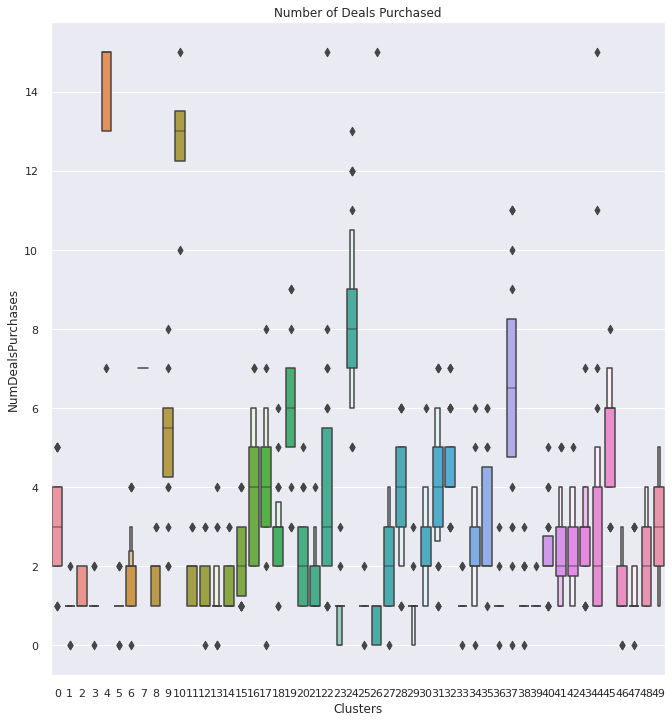

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

# BIRCH
##Phân cụm BIRCH (BIRCH là  Balanced Iterative Reduce và Clustering using  Hierarchies) .Nó liên quan đến việc xây dựng một cấu trúc cây mà từ đó các trung tâm cụm sẽ được trích xuất.

## Thực hiện thông qua lớp Birch và cấu hình chính để điều chỉnh là siêu tham số “threshold” (ngưỡng) và “n_clusters”,sau đó ước tính số lượng các cụm.

In [ ]:
from sklearn.cluster import Birch
#Initiating the Birch Clustering model 
BP = Birch(threshold=0.01, n_clusters=4)
# fit model and predict clusters
BP_df = BP.fit_predict(PCA_df)
PCA_df["Clusters"] = BP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= BP_df

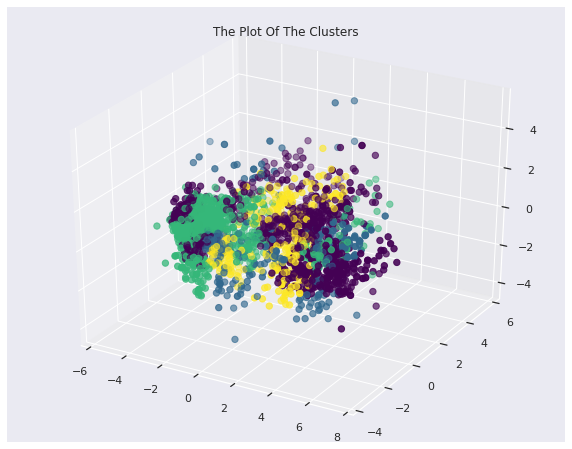

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

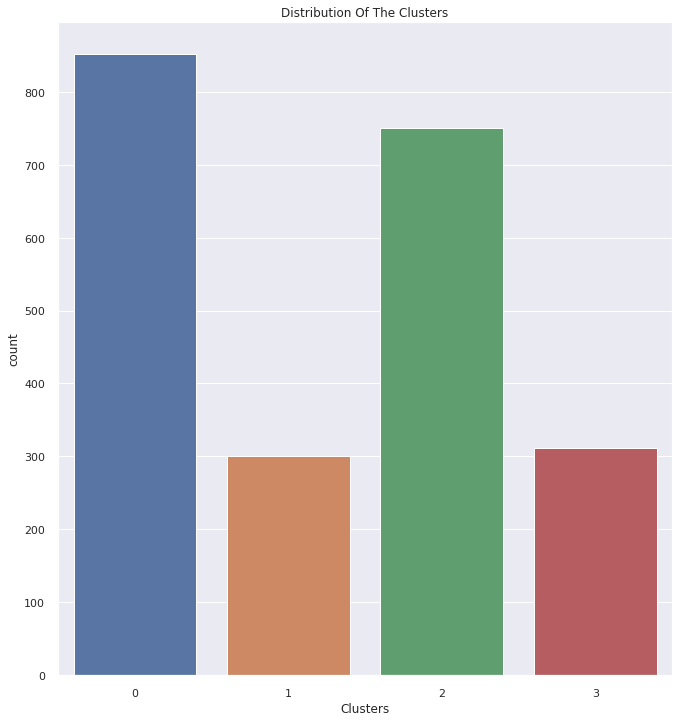

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

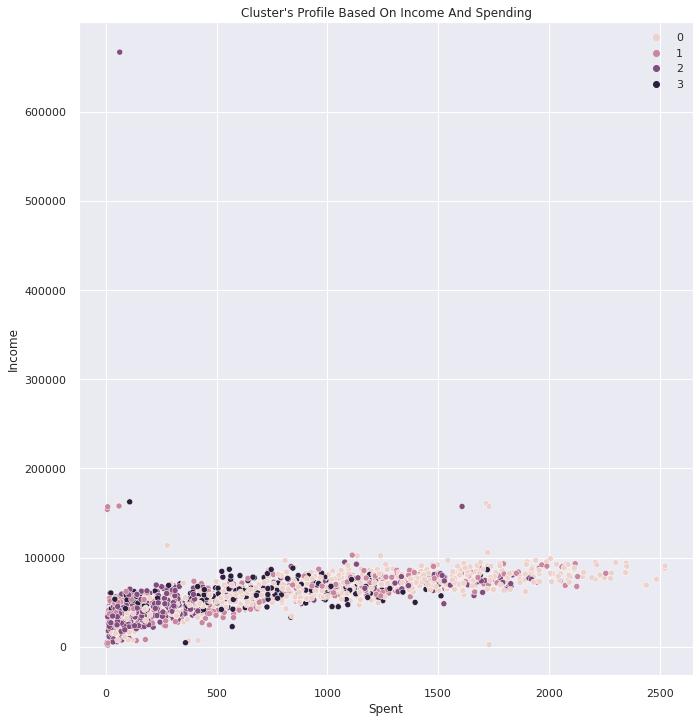

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

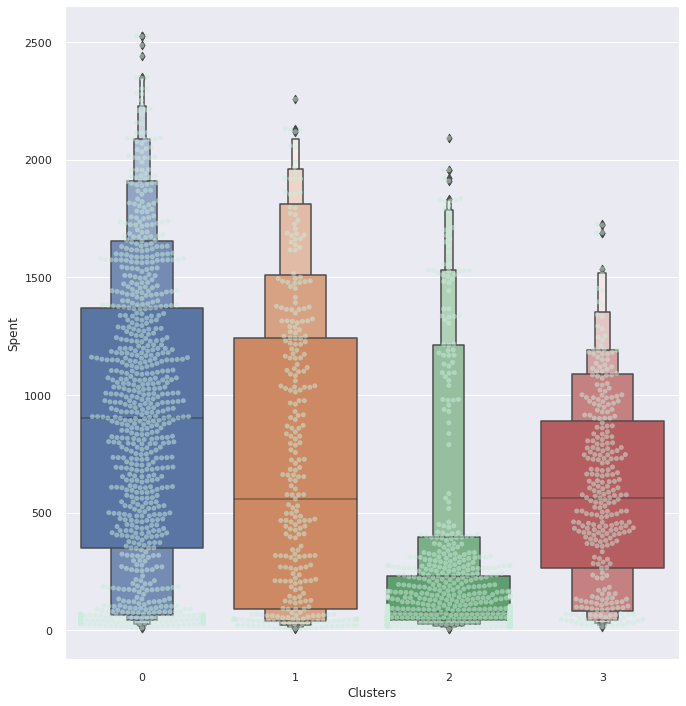

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

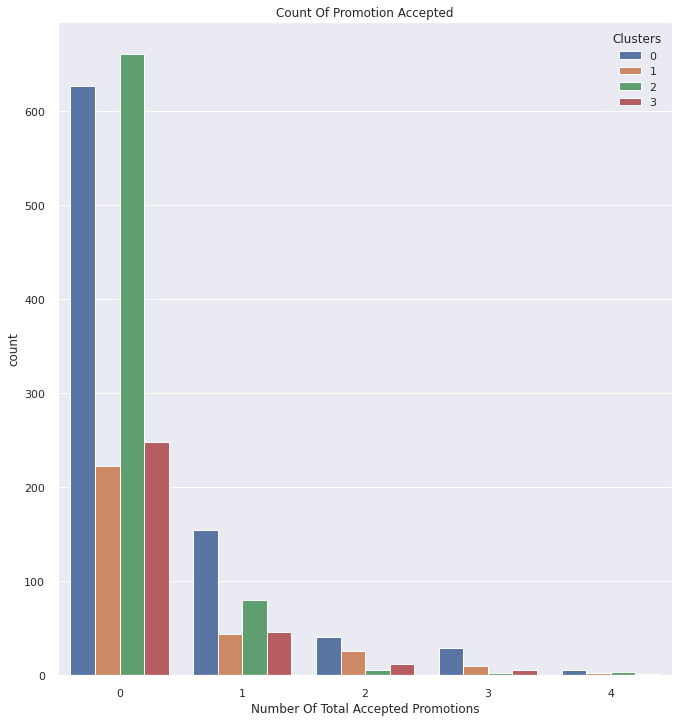

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

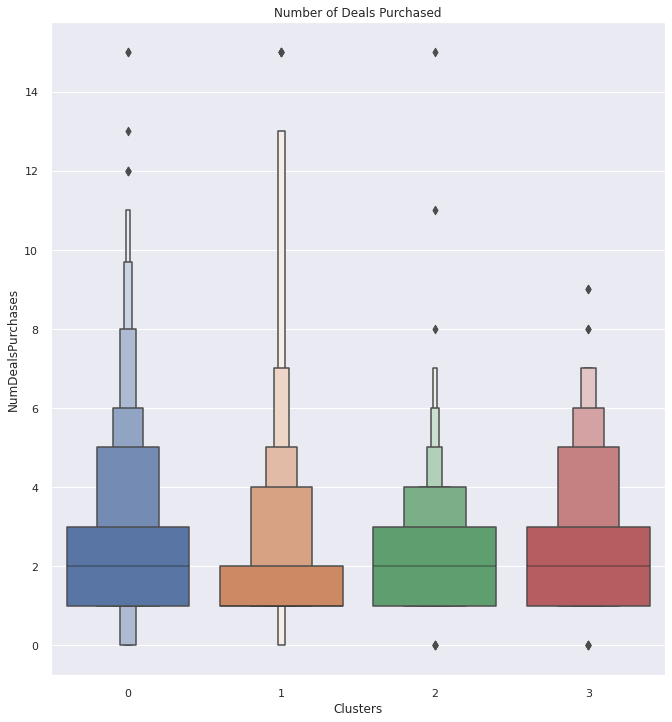

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

# DBSCAN
##DBSCAN Clustering (DBSCAN là Density-Based Spatial Clustering of Applications with Noise)-phân cụm dựa theo mật độ phi tham số . 

## Với một tập các điểm đã cho trong một số không gian, thuật toán sẽ gom nhóm các điểm với nhau (các điểm có nhiều hàng xóm lân cận với bán kính cố định (fixed-radius near neighbors) ) thành một nhóm, và đánh dấu là các điểm ngoại lệ nếu chúng nằm tách biệt với các điểm đã gom nhóm ở các vùng mật độ thấp (các điểm có các hàng xóm gần nhất ở khoảng cách quá xa )

## Nó được triển khai thông qua lớp DBSCAN và cấu hình chính để điều chỉnh là siêu tham số “eps”  “eps” (mô tả khoảng cách (bán kính) tối đa để xem xét) và “min_samples”( mô tả số điểm cần thiết để tạo thành một cụm.) 

In [ ]:
from sklearn.cluster import DBSCAN
#Initiating the BBSCAN Clustering model 
DP = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
DP_df = DP.fit_predict(PCA_df)
PCA_df["Clusters"] = DP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= DP_df

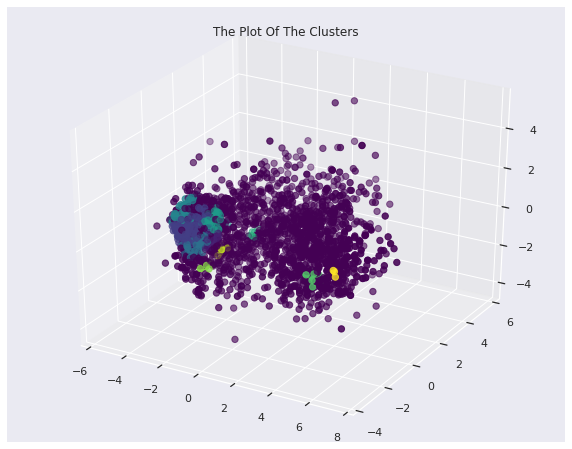

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

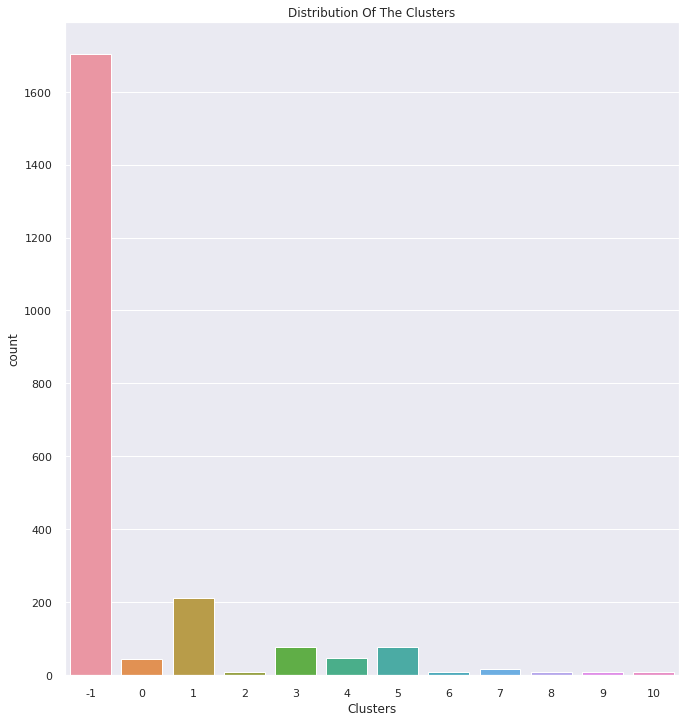

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

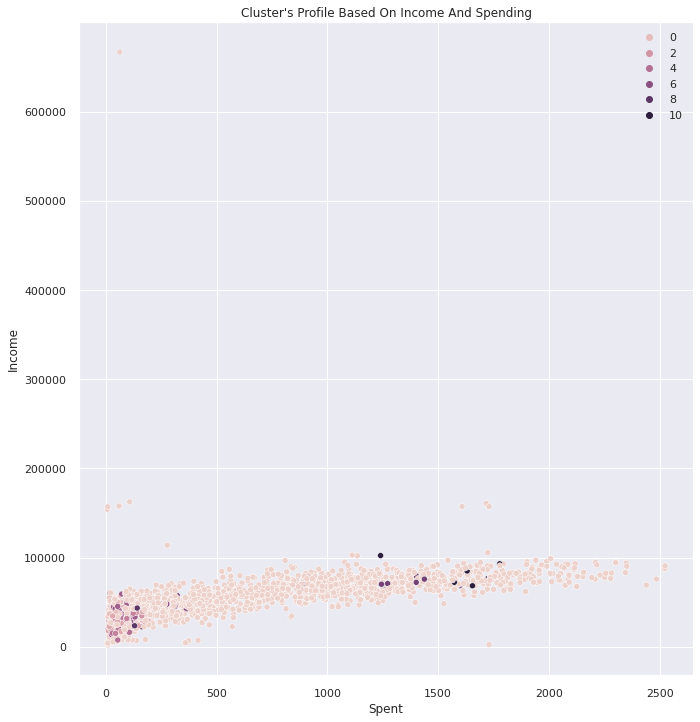

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

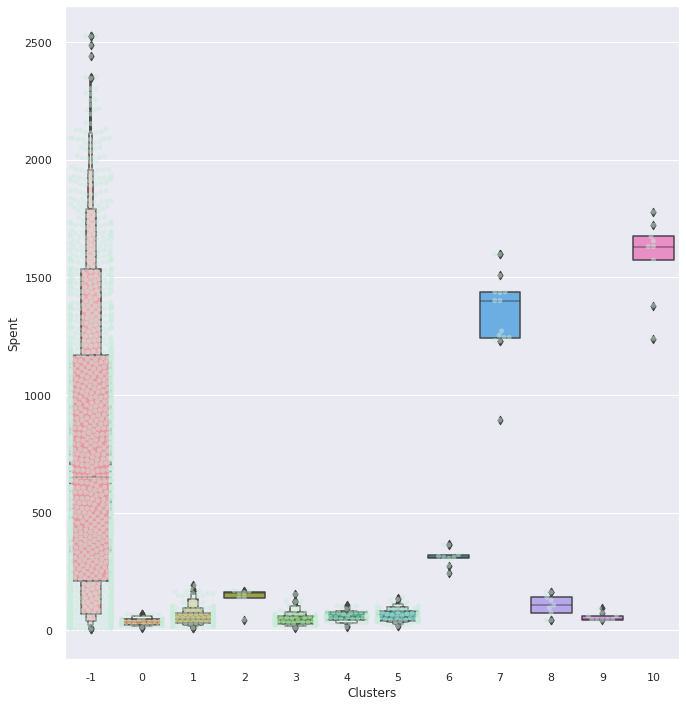

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

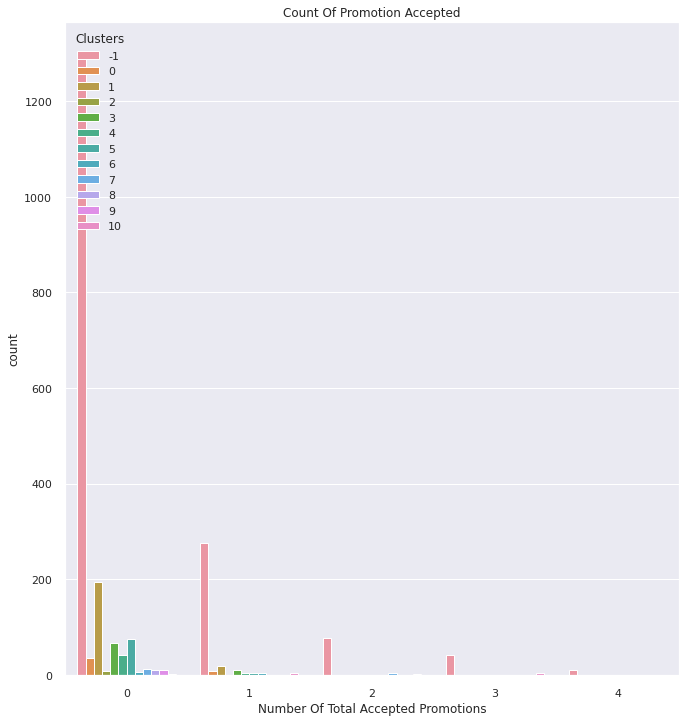

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

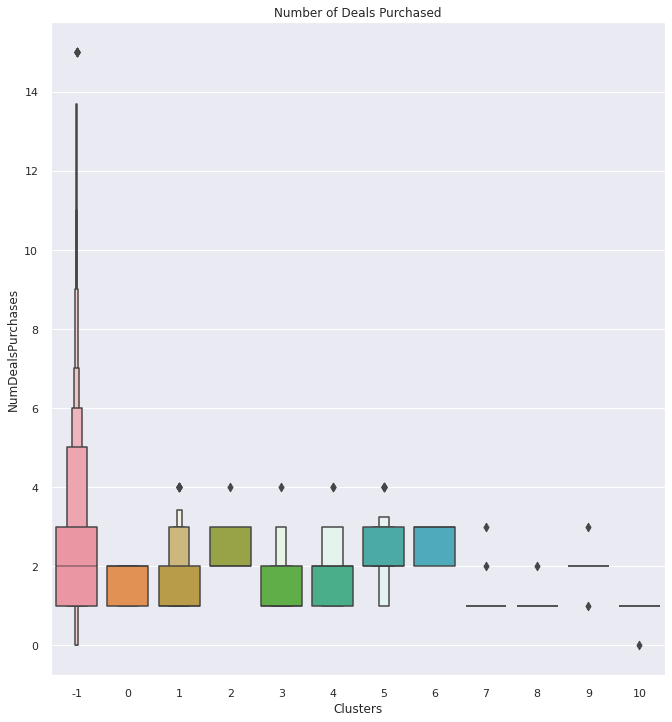

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

# Mini-Batch K-Means
## Mini-Batch K-Means là một phiên bản khác của k-means nhằm thực hiện các bản cập nhật cho các trung tâm cụm bằng cách sử dụng các mẫu nhỏ thay vì toàn bộ tập dữ liệu, điều này có thể giúp làm với nhanh hơn cho các tập dữ liệu lớn .

## Nó được triển khai thông qua lớp MiniBatchKMeans và cấu hình chính để điều chỉnh là siêu tham số “n_clusters” được đặt thành số lượng cụm ước tính trong dữ liệu.

In [ ]:
from sklearn.cluster import MiniBatchKMeans
#Initiating the MiniBatchKMeans Clustering model 
MP = MiniBatchKMeans(n_clusters=4)
# fit model and predict clusters
MP_df = MP.fit_predict(PCA_df)
PCA_df["Clusters"] = MP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= MP_df

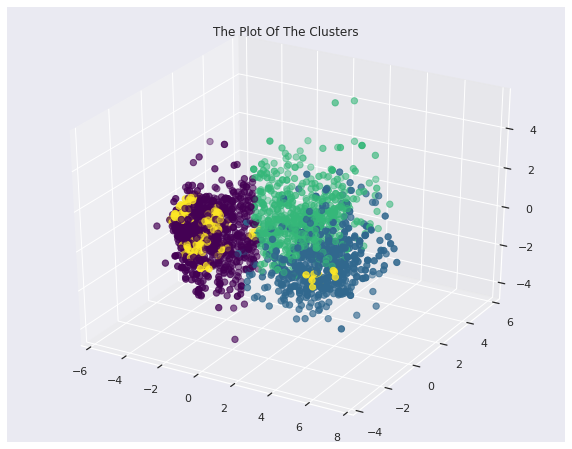

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

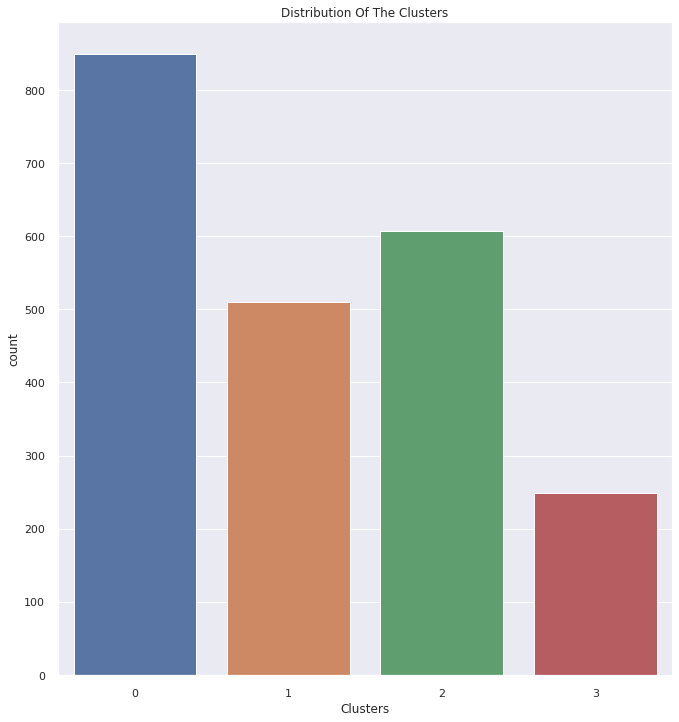

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

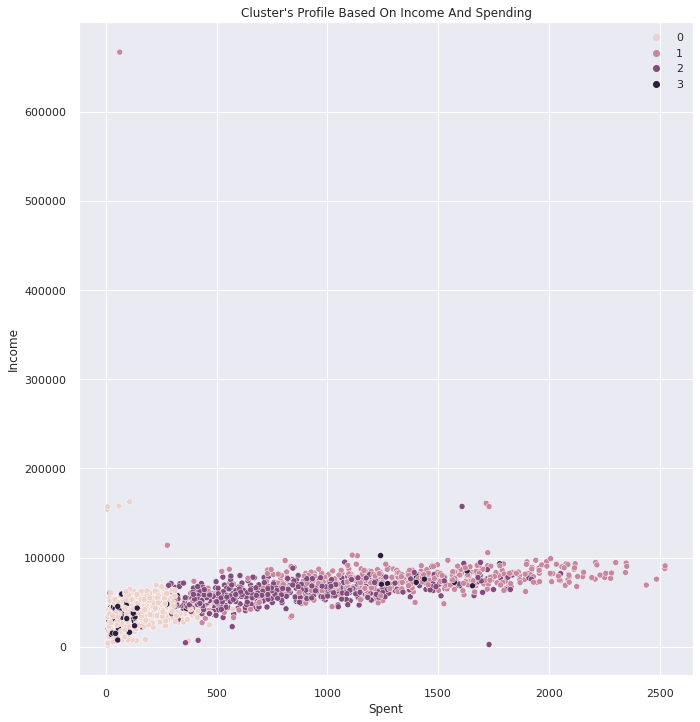

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

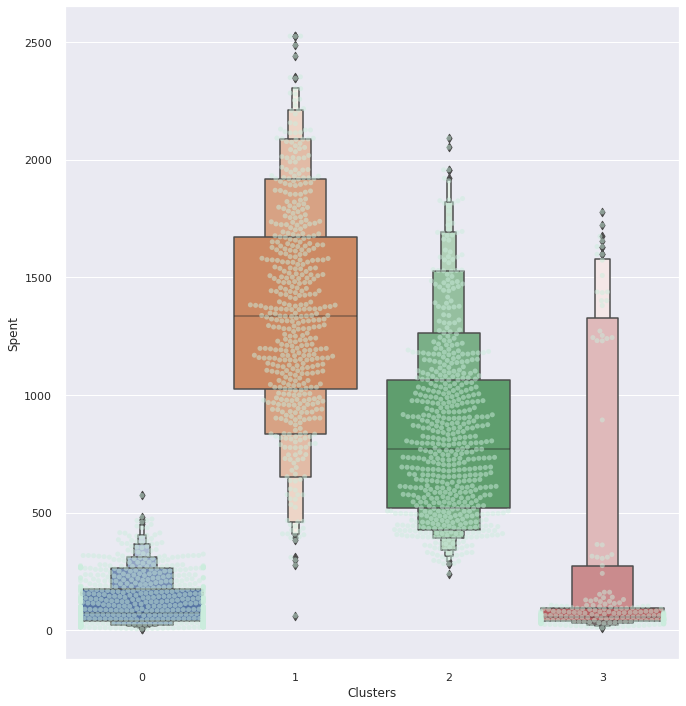

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

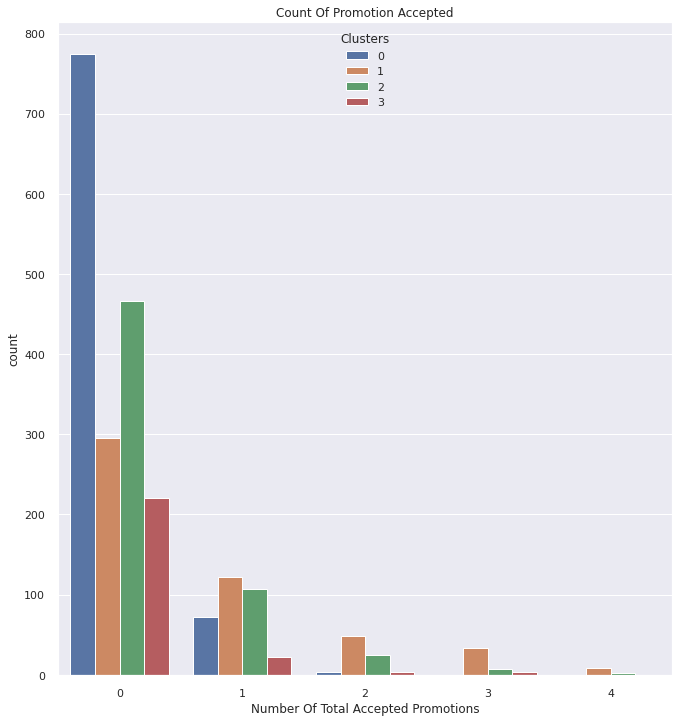

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

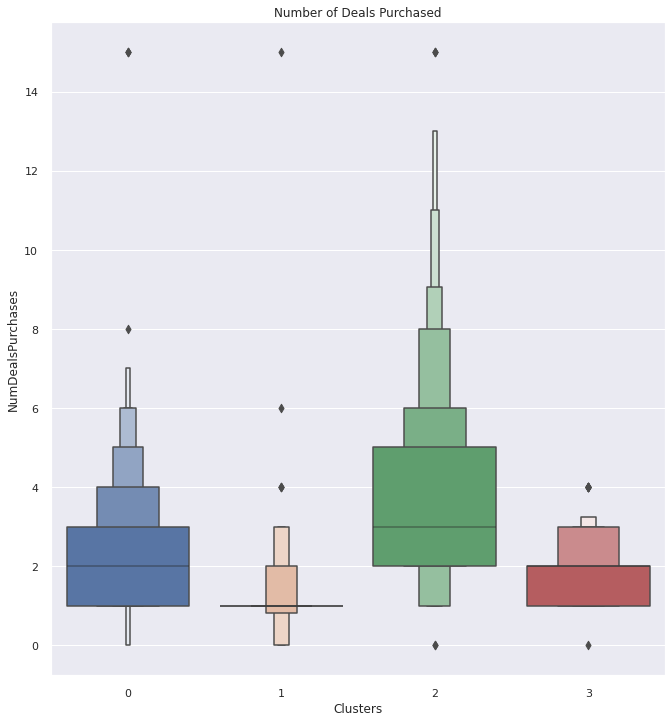

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

# Mean Shift
## Mean shift (phân cụm phân cấp) liên quan đến việc tìm kiếm và điều chỉnh các trung tâm dựa trên mật độ của các mẫu trong không gian đặc trưng.

## Nó được triển khai thông qua lớp MeanShift và cấu hình chính để điều chỉnh là siêu tham  số “bandwidth”.


In [ ]:
from sklearn.cluster import MeanShift
#Initiating the MeanShift Clustering model 
MSP = MeanShift()
# fit model and predict clusters
MSP_df = MSP.fit_predict(PCA_df)
PCA_df["Clusters"] = MSP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= MSP_df

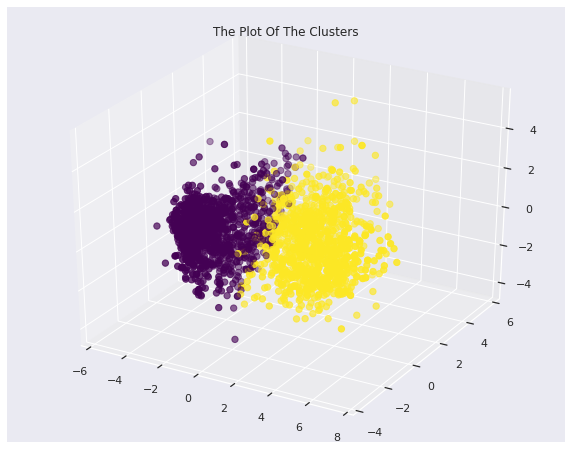

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

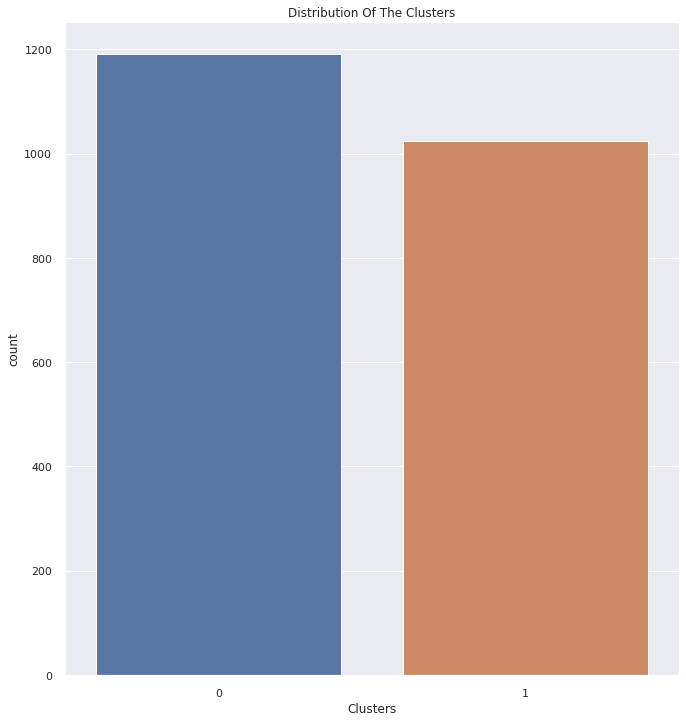

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

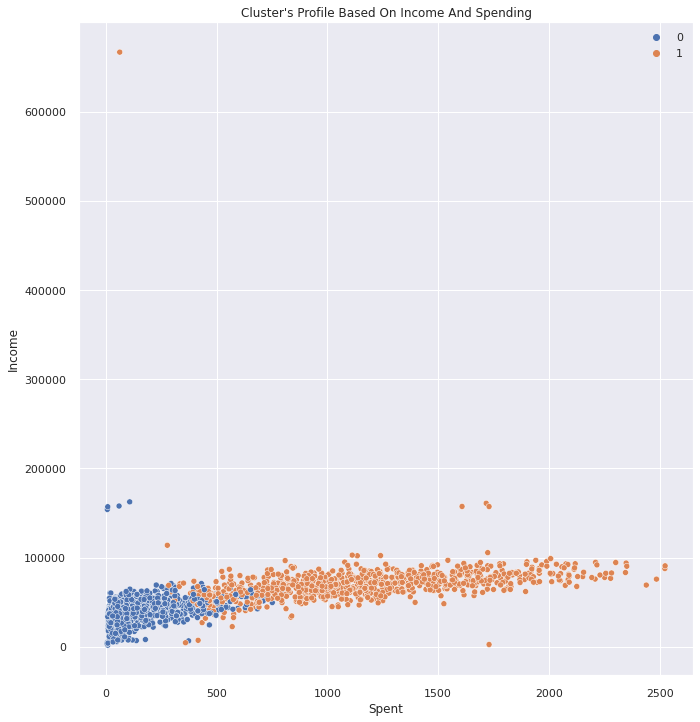

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

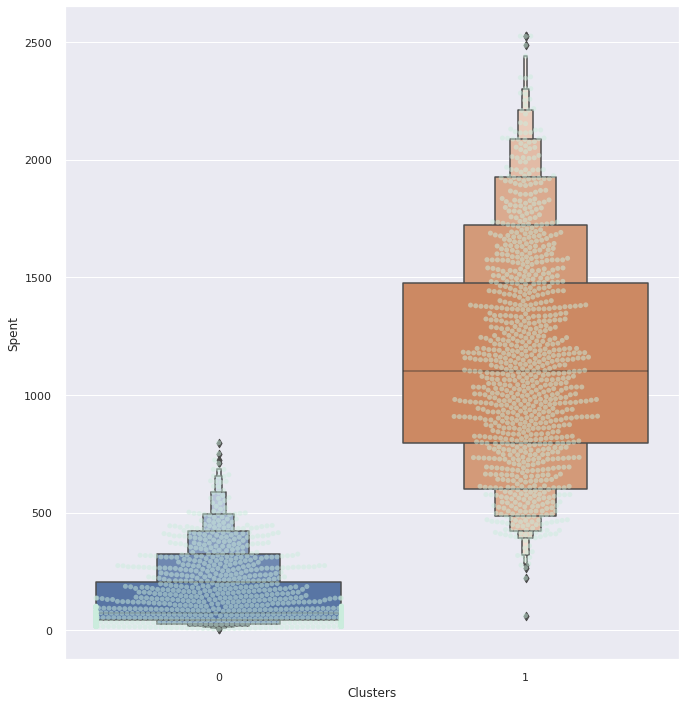

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

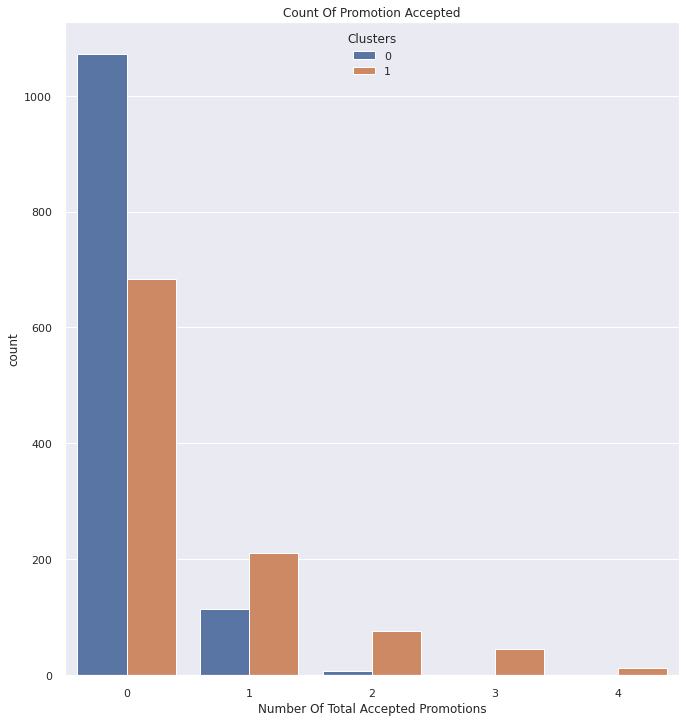

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

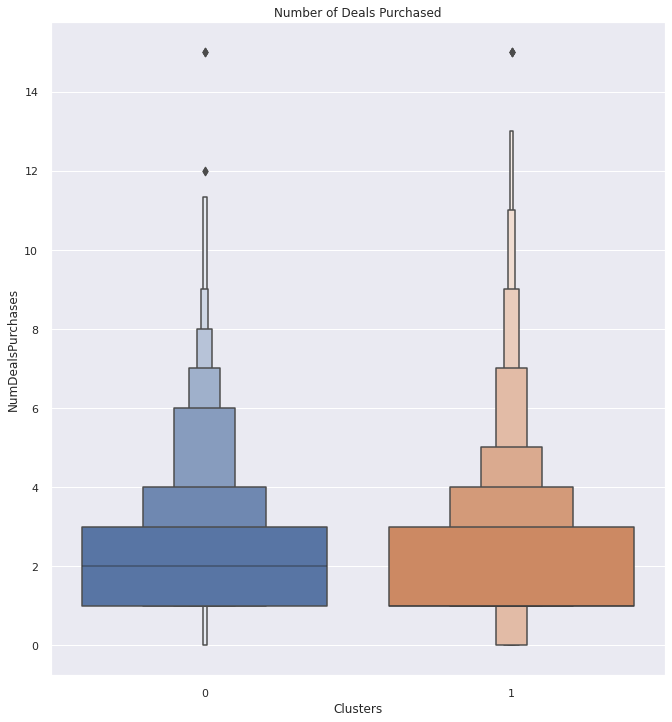

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

# OPTICS
## OPTICS clustering (OPTICS là Ordering Points To Identify the Clustering Structure) -xác định cấu trúc cụm theo thứ tự các điểm là phiên bản khác của thuật toán DBSCAN phía trên
##Nó được triển khai thông qua lớp OPTICS và cấu hình chính (giống với DBSCAN) để điều chỉnh là siêu tham số “eps” (mô tả khoảng cách (bán kính) tối đa để xem xét) và “min_samples”( mô tả số điểm cần thiết để tạo thành một cụm.). .

In [ ]:
from sklearn.cluster import OPTICS
#Initiating the OPTICS Clustering model 
OP = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
OP_df = OP.fit_predict(PCA_df)
PCA_df["Clusters"] = OP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= OP_df

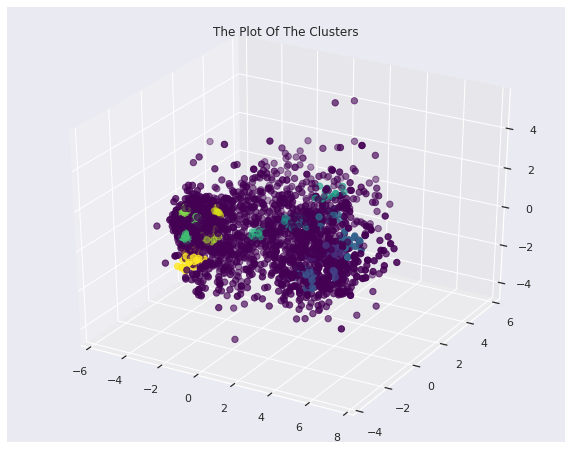

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

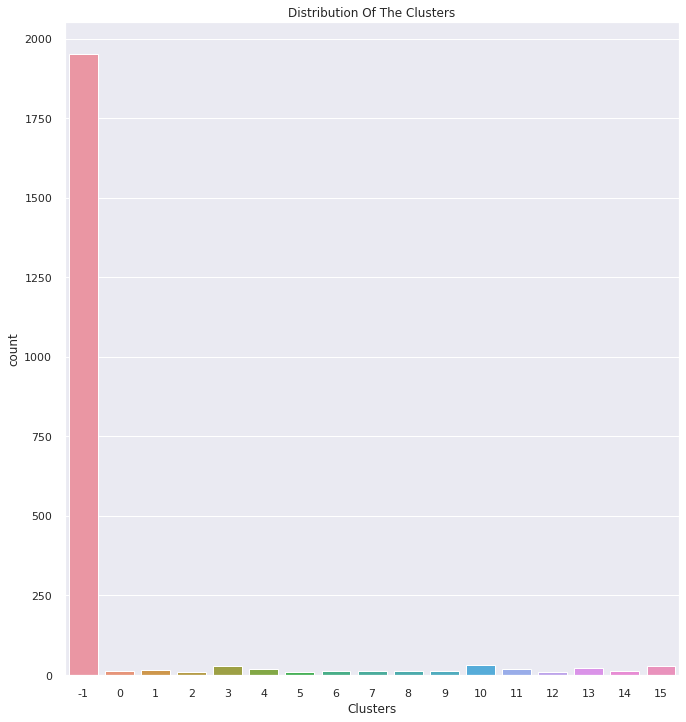

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

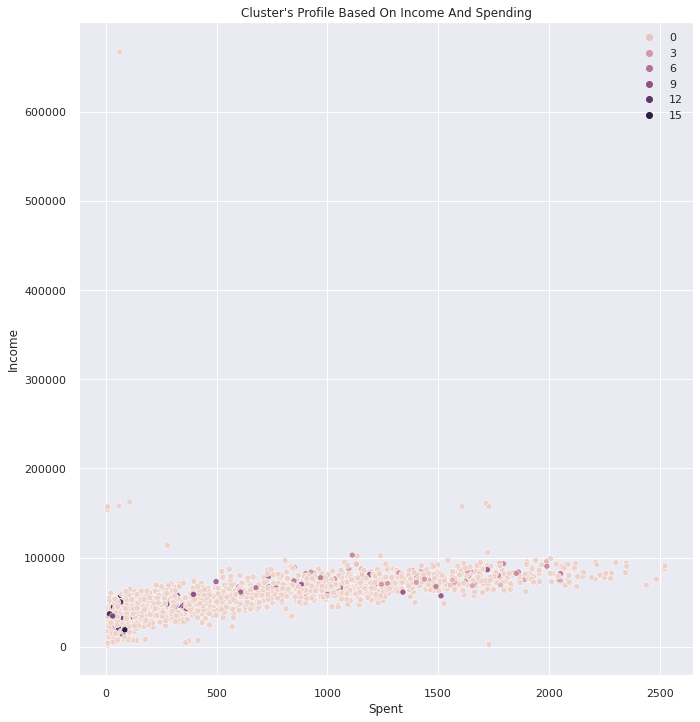

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

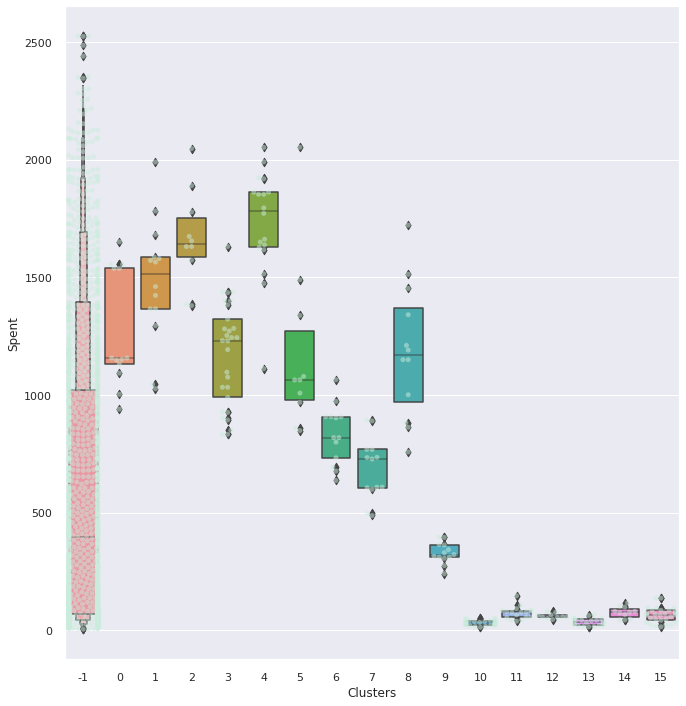

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

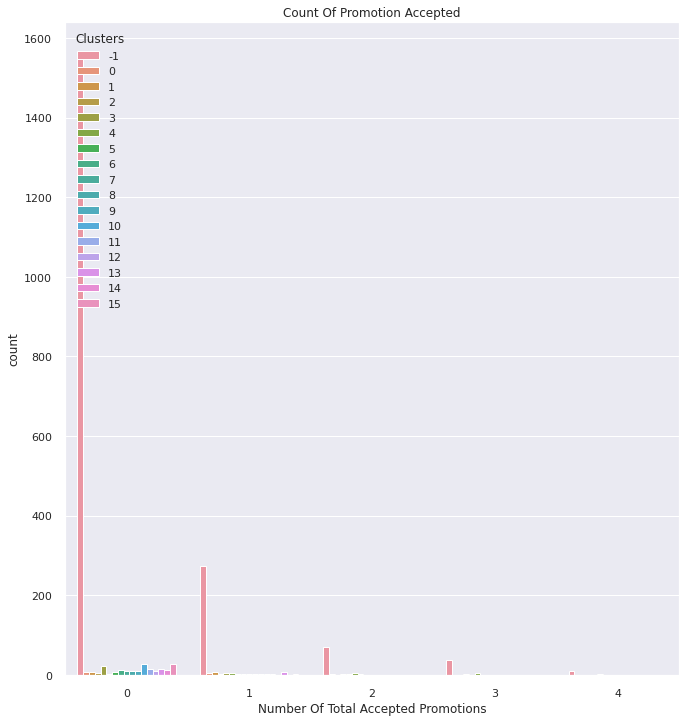

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

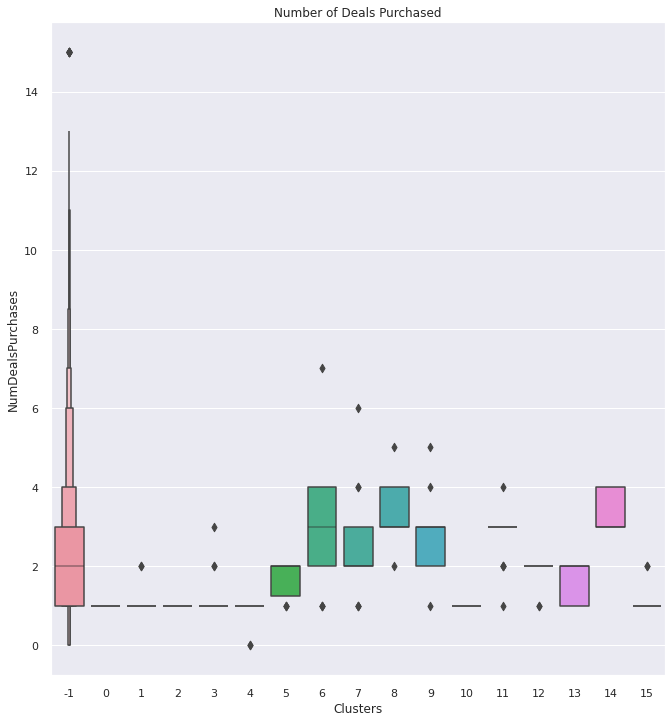

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

# Spectral Clustering
##Phân cụm phổ 
##Nó được triển khai thông qua lớp SpectralClustering và Spectral Clustering chính là một lớp tổng quát của các phương pháp phân cụm, được rút ra từ đại số tuyến tính để điều chỉnh là siêu tham số “n_clusters” (chỉ định số lượng ước tính của các cụm trong dữ liệu).

In [ ]:
from sklearn.cluster import SpectralClustering
#Initiating the SpectralClustering Clustering model 
SP = SpectralClustering(n_clusters=4)
# fit model and predict clusters
SP_df = SP.fit_predict(PCA_df)
PCA_df["Clusters"] = SP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= SP_df

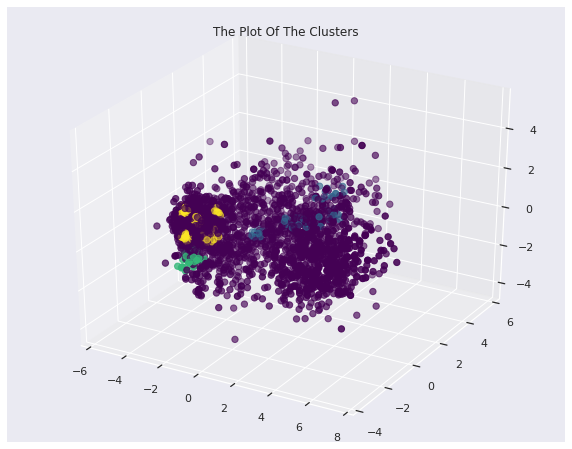

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

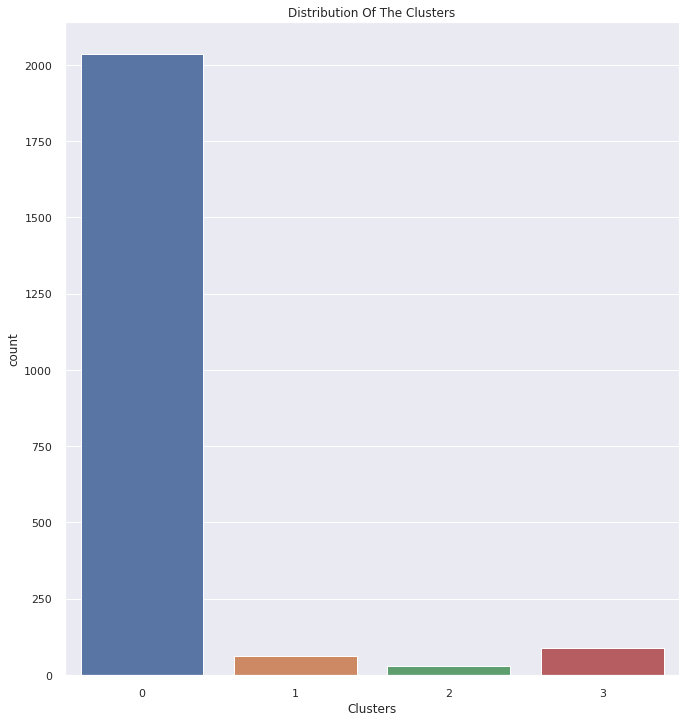

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

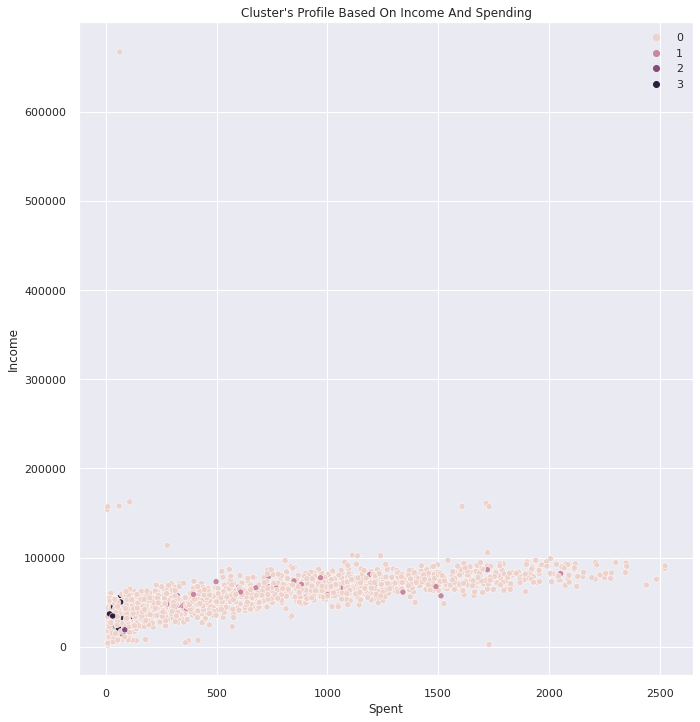

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

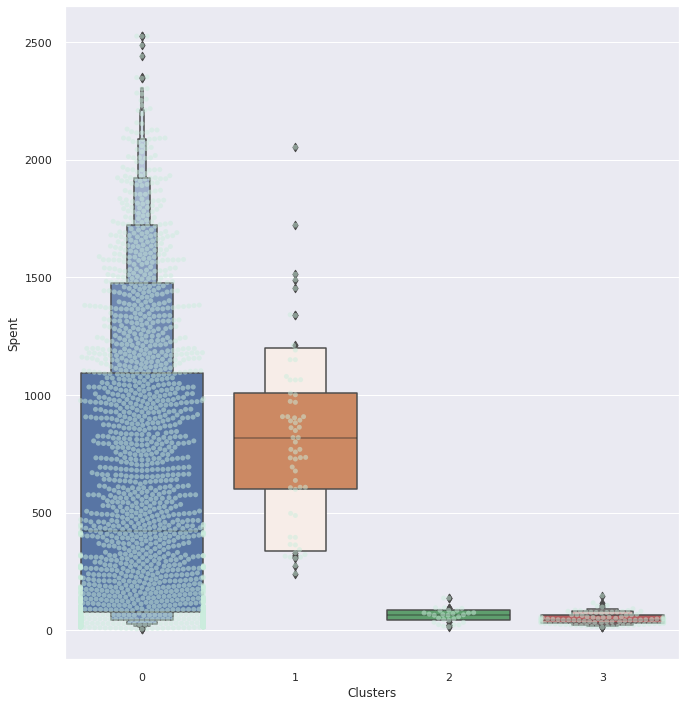

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

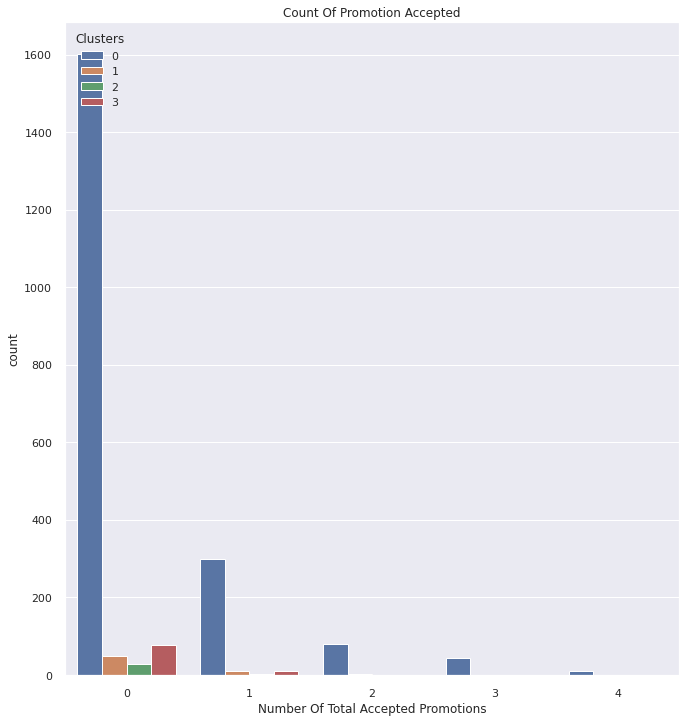

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

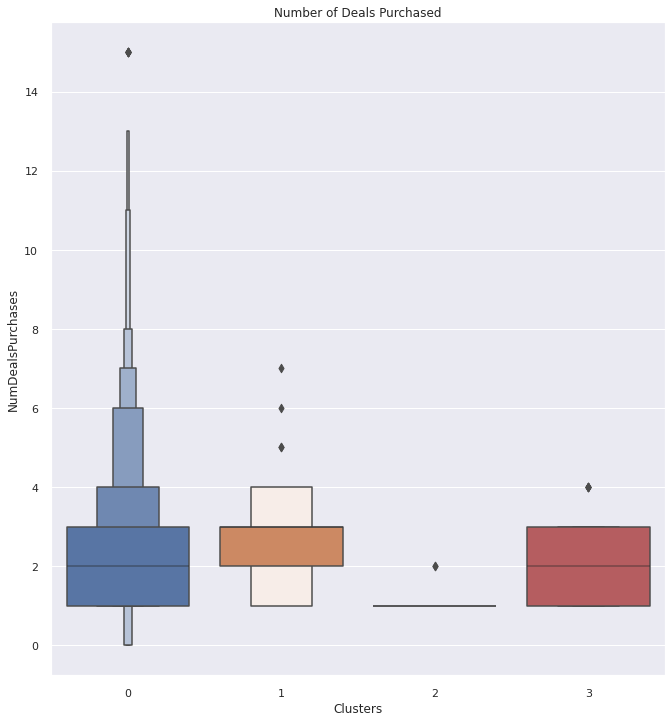

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

# Gaussian Mixture Model
## Mô hình hỗn hợp Gaussian tóm tắt một hàm mật độ xác suất đa biến với một hỗn hợp các phân phối xác suất Gauss như tên gọi của nó.


## Nó được triển khai thông qua lớp Gaussian Mixture và cấu hình chính để điều chỉnh là siêu tham số “n_clusters” được sử dụng để chỉ định số lượng ước tính của các cụm trong dữ liệu.

In [ ]:
from sklearn.mixture import GaussianMixture
#Initiating the GaussianMixture Clustering model 
GP = GaussianMixture(n_components=4)
# fit model and predict clusters
GP_df = GP.fit_predict(PCA_df)
PCA_df["Clusters"] = GP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= GP_df

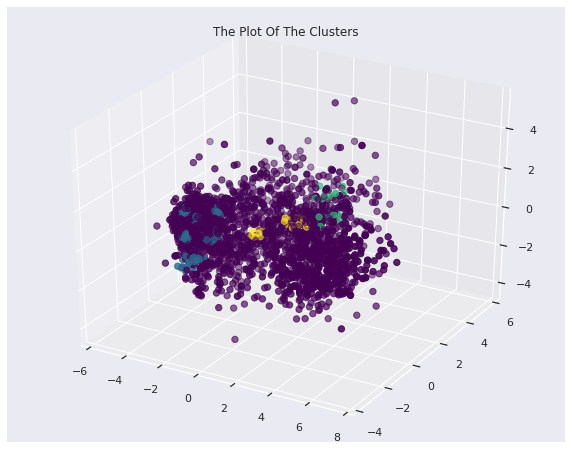

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

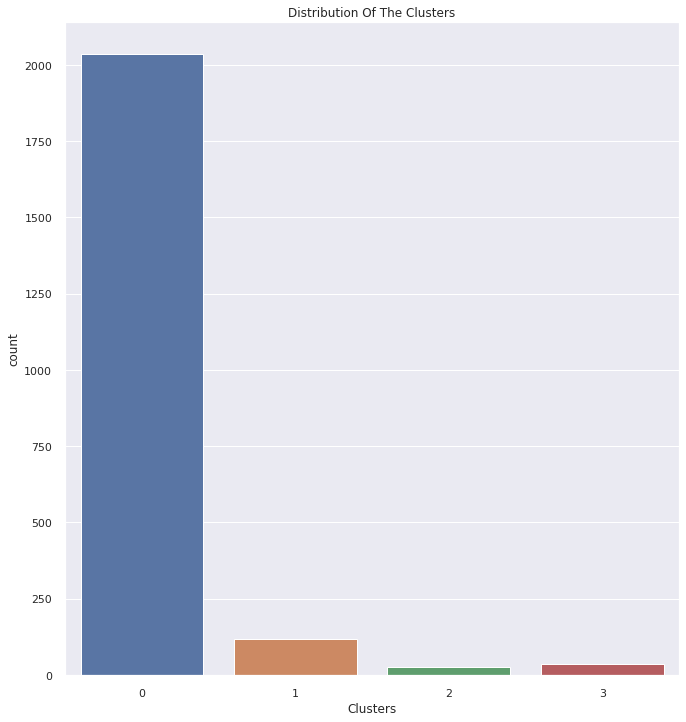

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

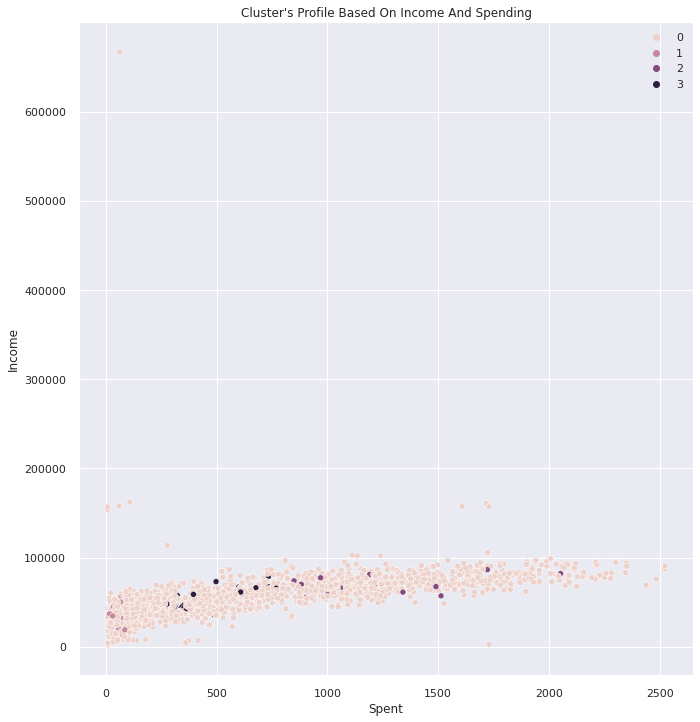

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

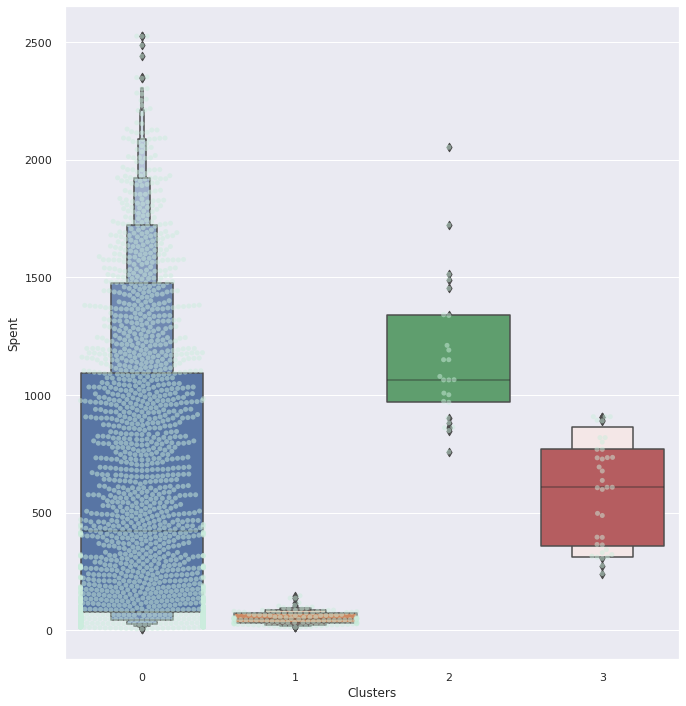

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

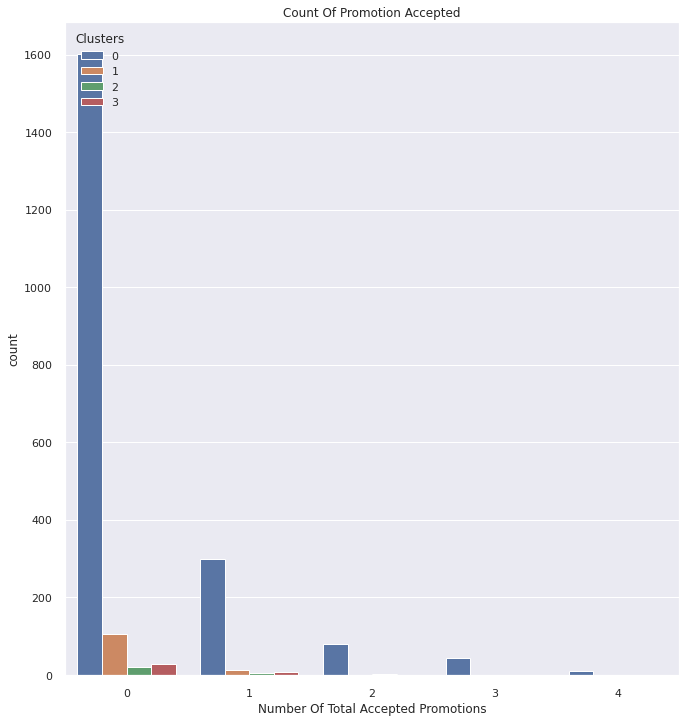

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

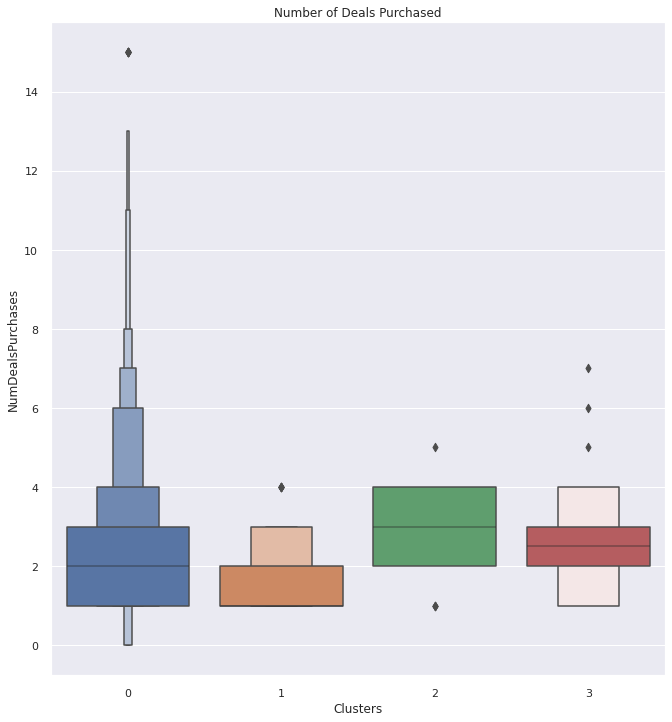

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()